####                  CAPSTONE PROJECT II: CONCRETE MANUFACTURING INDUSTRY ANALYSIS ~ MANVI BAJPAI

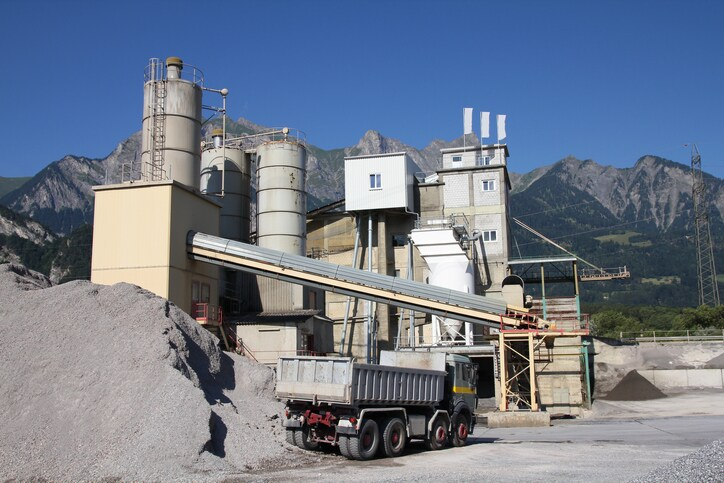

##### Project Description: 

For the majority of projects in the construction industry, concrete is most frequently used as the foundation. 
Concrete technology provides instruction on all facets of concrete, including mix design, batching, mixing, transporting, placing, consolidating, finishing, and curing. It also covers all elements of concrete, from batching to mixing to transporting, placing and finishing. 

The purpose of this study is to identify the best cement/concrete product available on the market, evaluate its strength using various machine learning modelling techniques.

##### Project Findings:

The goals of these machine learning models are as follows:

**Step I:** Examining different machine learning modelling techniques for finding the high performing and effective concrete.

**Step II:** Understanding how various ingredients used for the formation of concrete contributes to it's quality and high performance.

**Step III:** Finding the top two models that showcases atmost accuracy and precision in concrete qualities and it's ingredients.

##### Data Set:

Dataset: https://www.kaggle.com/datasets/vinayakshanawad/cement-manufacturing-concrete-dataset

**Abstract:** The dataset has been downloaded from Kaggle's Civil Engineering: Cement Manufacturing Dataset.

**Given that:**

i) The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

ii) The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

##### Attribute Information: 

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

**Cement** : measured in kg in a m3 mixture
**Blast**: measured in kg in a m3 mixture
**Fly ash** : measured in kg in a m3 mixture
**Water** : measured in kg in a m3 mixture
**Superplasticizer** : measured in kg in a m3 mixture
**Coarse Aggregate** : measured in kg in a m3 mixture
**Fine Aggregate** : measured in kg in a m3 mixture
**Age** : day (1~365)
**Concrete compressive strength measured in MPa**

#### Import required libraries for analysis

In [40]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor)
from sklearn.svm import SVR

from sklearn import metrics
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.utils import resample

#### Understanding the dataset

In [41]:
os.chdir(r"C:\Users\Hp\OneDrive\Desktop\Capstone Project 2")

In [42]:
df = pd.read_csv("Concrete Manufacturing Industry - Data.csv")

In [5]:
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [13]:
df.shape

(1030, 9)

In [14]:
df.describe().T ## Descriptive statistics and count of the columns of the dataset.

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

#### Exploratory Data Analysis

**Univariate Analysis : I) Outliers II) Skewness III) Missing Values**

In [17]:
c_25 = np.percentile(df['cement'], 25) # CEMENT
c_75 = np.percentile(df['cement'], 75)
iqr_c = c_75 - c_25

print("The first quartile Q1 is:", c_25)
print("The third quartile Q3 is:", c_75)
print("The interquartile range IQR is:", iqr_c)

The first quartile Q1 is: 192.375
The third quartile Q3 is: 350.0
The interquartile range IQR is: 157.625


The number of outliers in 'cement' are: 0


<Axes: >

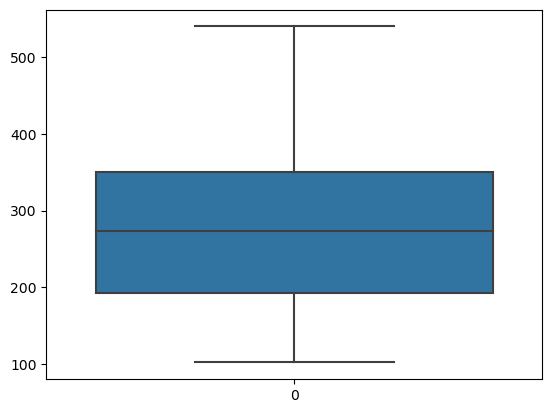

In [19]:
cutoff_c = 1.5 * iqr_c
low_c = c_25 - cutoff_c
up_c = c_75 + cutoff_c
outlier_c = [x for x in df ['cement'] if x < low_c or x > up_c]
print("The number of outliers in 'cement' are:", len(outlier_c))

sns.boxplot(df ['cement'])

Cement's Skewness: 0.5094811788717731


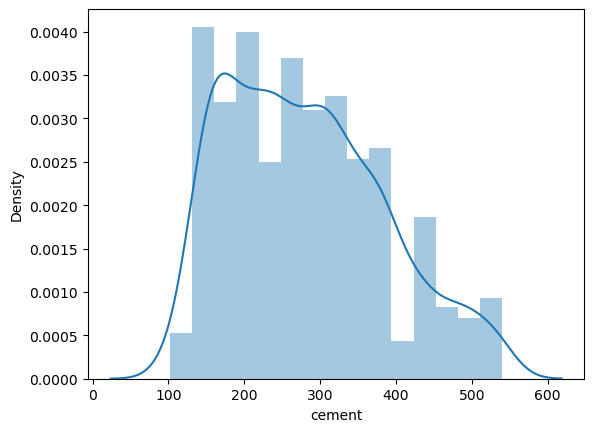

In [20]:
sns.distplot(df['cement'], kde = True)
print("Cement's Skewness:", df['cement'].skew())

In [22]:
df['cement'].isnull().sum()

0

In [23]:
slag_25 = np.percentile(df ['slag'], 25) # SLAG
slag_75 = np.percentile(df ['slag'], 75)
iqr_slag = slag_75 - slag_25

print("The first quartile Q1 is:", slag_25)
print("The third quartile Q3 is:", slag_75)
print("The interquartile range IQR is:", iqr_slag)

The first quartile Q1 is: 0.0
The third quartile Q3 is: 142.95
The interquartile range IQR is: 142.95


The number of outliers in 'slag' are: 2


<Axes: >

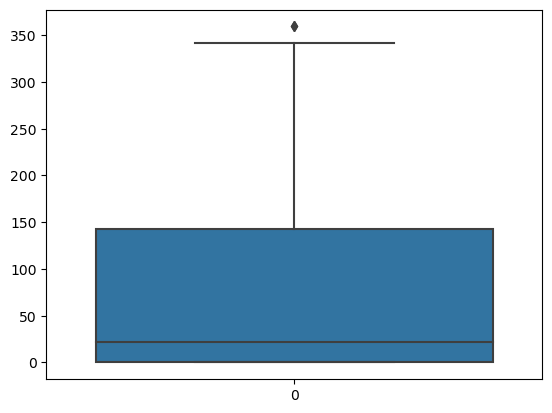

In [24]:
cutoff_slag = 1.5 * iqr_slag
low_slag = slag_25 - cutoff_slag
up_slag = slag_75 + cutoff_slag

outlier_slag = [x for x in df ['slag'] if x < low_slag or x > up_slag]
print("The number of outliers in 'slag' are:", len(outlier_slag))

sns.boxplot(df ['slag'])

Slag's Skewness: 0.8007168956061774


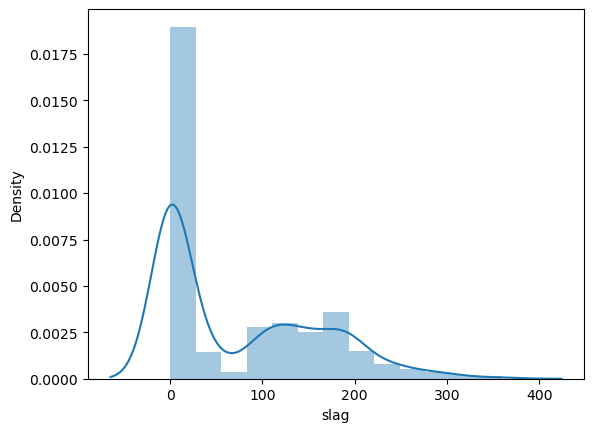

In [25]:
sns.distplot(df ['slag'], kde = True)
print("Slag's Skewness:", df ['slag'].skew())

In [26]:
df ['slag'].isnull().sum()

0

In [27]:
ash_25 = np.percentile(df ['ash'], 25) #ASH
ash_75 = np.percentile(df ['ash'], 75)
iqr_ash = ash_75 - ash_25

print("The first quartile Q1 is:", ash_25)
print("The third quartile Q3 is:", ash_75)
print("The interquartile range IQR is:", iqr_ash)

The first quartile Q1 is: 0.0
The third quartile Q3 is: 118.3
The interquartile range IQR is: 118.3


The number of outliers in 'ash' are: 0


<Axes: >

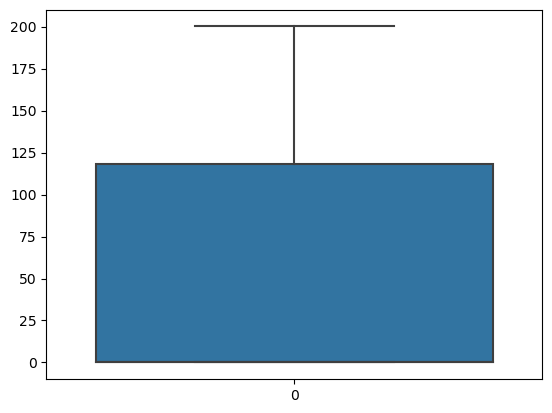

In [30]:
cutoff_ash = 1.5 * iqr_ash
low_ash = ash_25 - cutoff_ash
up_ash = ash_75 + cutoff_ash

outlier_ash = [x for x in df ['ash'] if x < low_ash or x > up_ash]
print("The number of outliers in 'ash' are:", len(outlier_ash))

sns.boxplot(df ['ash'])

Ash's Skewness: 0.5373539058066844


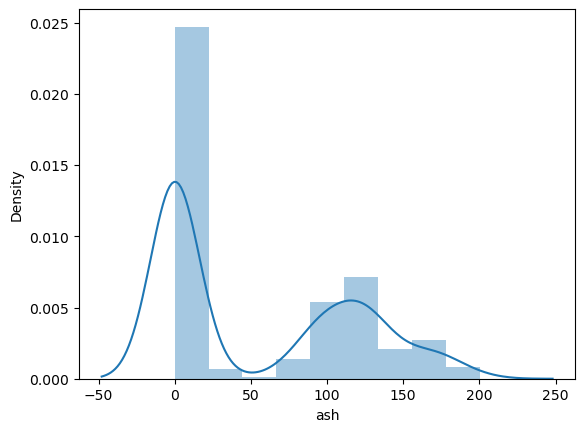

In [31]:
sns.distplot(df ['ash'], kde = True)
print("Ash's Skewness:", df ['ash'].skew())

In [32]:
df ['ash'].isnull().sum()

0

In [33]:
water_25 = np.percentile(df ['water'], 25) #WATER
water_75 = np.percentile(df ['water'], 75)
iqr_water = water_75 - water_25

print("The first quartile Q1 is:", water_25)
print("The third quartile Q3 is:", water_75)
print("The interquartile range IQR is:", iqr_water)

The first quartile Q1 is: 164.9
The third quartile Q3 is: 192.0
The interquartile range IQR is: 27.099999999999994


The number of outliers in 'water' are: 9


<Axes: >

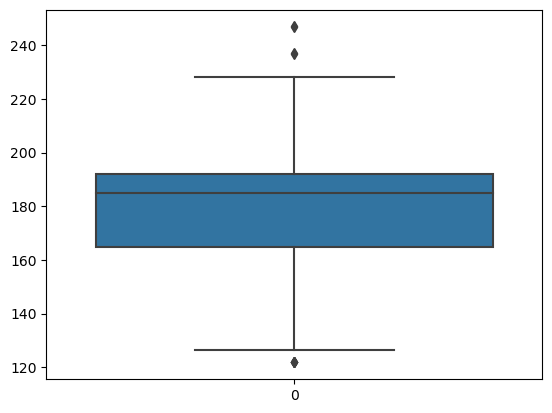

In [34]:
cutoff_water = 1.5 * iqr_water
low_water = water_25 - cutoff_water
up_water = water_75 + cutoff_water

outlier_water = [x for x in df ['water'] if x < low_water or x > up_water]
print("The number of outliers in 'water' are:", len(outlier_water))

sns.boxplot(df ['water'])

Water's Skewness: 0.07462838428549402


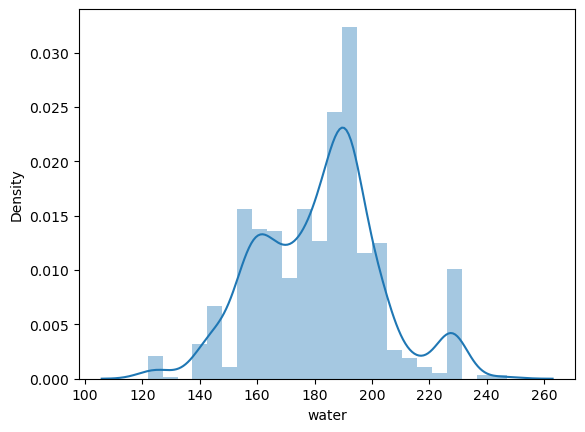

In [35]:
sns.distplot(df ['water'], kde = True)
print("Water's Skewness:", df ['water'].skew())

In [36]:
df ['water'].isnull().sum()

0

In [37]:
superplastic_25 = np.percentile(df['superplastic'], 25) #SUPER PLASTIC
superplastic_75 = np.percentile(df ['superplastic'], 75)
iqr_superplastic = superplastic_75 - superplastic_25

print("The first quartile Q1 is:", superplastic_25)
print("The third quartile Q3 is:", superplastic_75)
print("The interquartile range IQR is:", iqr_superplastic)

The first quartile Q1 is: 0.0
The third quartile Q3 is: 10.2
The interquartile range IQR is: 10.2


The number of outliers in 'superplastic' are: 10


<Axes: >

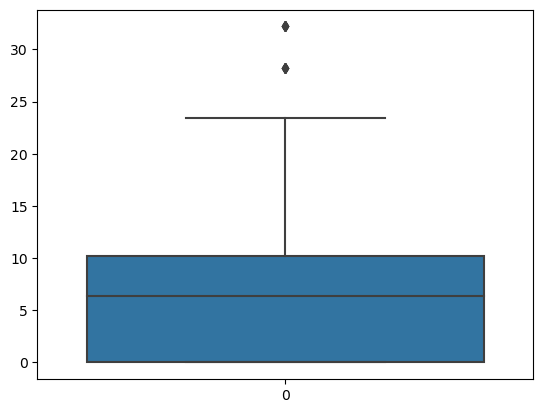

In [39]:
cutoff_superplastic = 1.5 * iqr_superplastic
low_superplastic = superplastic_25 - cutoff_superplastic
up_superplastic = superplastic_75 + cutoff_superplastic

outlier_superplastic = [x for x in df ['superplastic'] if x < low_superplastic or x > up_superplastic]
print("The number of outliers in 'superplastic' are:", len(outlier_superplastic))

sns.boxplot(df ['superplastic'])

Superplstic's Skewness: 0.9072025748672466


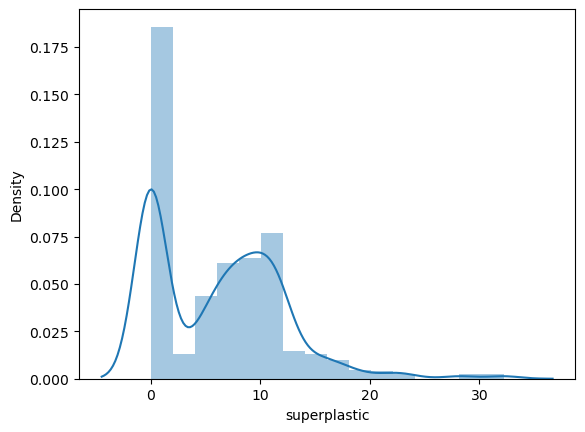

In [40]:
sns.distplot(df ['superplastic'], kde = True)
print("Superplstic's Skewness:", df ['superplastic'].skew())

In [41]:
df ['superplastic'].isnull().sum()

0

In [42]:
coarseagg_25 = np.percentile(df ['coarseagg'], 25) #COARSE
coarseagg_75 = np.percentile(df ['coarseagg'], 75)
iqr_coarseagg = coarseagg_75 - coarseagg_25

print("The first quartile Q1 is:", coarseagg_25)
print("The third quartile Q3 is:", coarseagg_75)
print("The interquartile range IQR is:", iqr_coarseagg)

The first quartile Q1 is: 932.0
The third quartile Q3 is: 1029.4
The interquartile range IQR is: 97.40000000000009


The number of outliers in 'coarseagg' out off 1030 records are: 0


<Axes: >

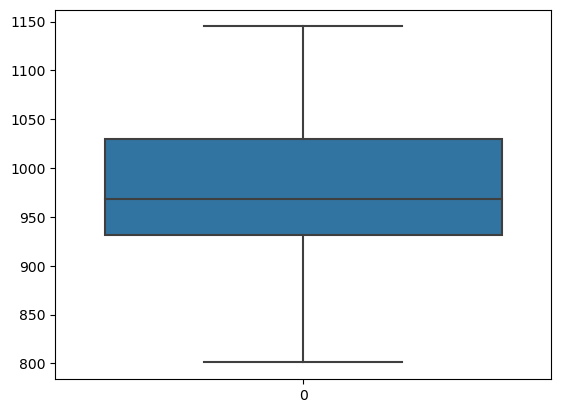

In [43]:
cutoff_coarseagg = 1.5 * iqr_coarseagg
low_coarseagg = coarseagg_25 - cutoff_coarseagg
up_coarseagg = coarseagg_75 + cutoff_coarseagg

outlier_coarseagg = [x for x in df ['coarseagg'] if x < low_coarseagg or x > up_coarseagg]
print("The number of outliers in 'coarseagg' out off 1030 records are:", len(outlier_coarseagg))

sns.boxplot(df ['coarseagg'])

Coarsegg's Skewness: -0.04021974481106704


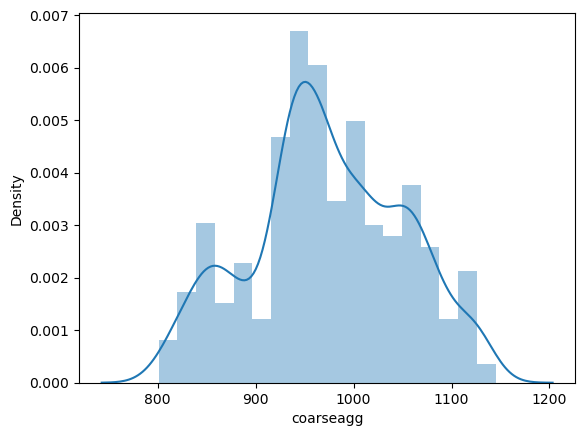

In [44]:
sns.distplot(df ['coarseagg'], kde = True)
print("Coarsegg's Skewness:", df ['coarseagg'].skew())

In [45]:
df ['coarseagg'].isnull().sum()

0

In [46]:
fineagg_25 = np.percentile(df ['fineagg'], 25) #FINE
fineagg_75 = np.percentile(df ['fineagg'], 75)
iqr_fineagg = fineagg_75 - fineagg_25

print("The first quartile Q1 is:", fineagg_25)
print("The third quartile Q3 is:", fineagg_75)
print("The interquartile range IQR is:", iqr_fineagg)

The first quartile Q1 is: 730.95
The third quartile Q3 is: 824.0
The interquartile range IQR is: 93.04999999999995


The number of outliers in 'fineagg' are: 5


<Axes: >

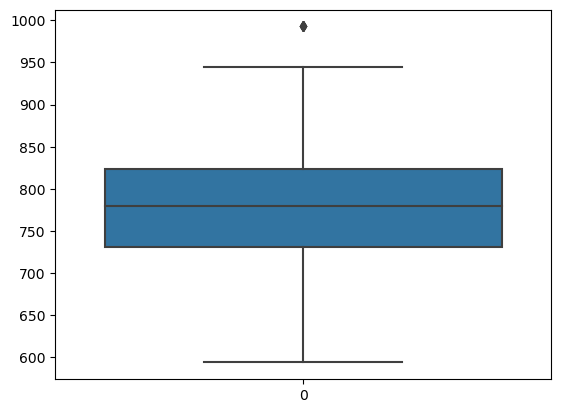

In [47]:
cutoff_fineagg = 1.5 * iqr_fineagg
low_fineagg = fineagg_25 - cutoff_fineagg
up_fineagg = fineagg_75 + cutoff_fineagg

outlier_fineagg = [x for x in df ['fineagg'] if x < low_fineagg or x > up_fineagg]
print("The number of outliers in 'fineagg' are:", len(outlier_fineagg))

sns.boxplot(df ['fineagg'])

Fineagg's Skewness: -0.25300959769707143


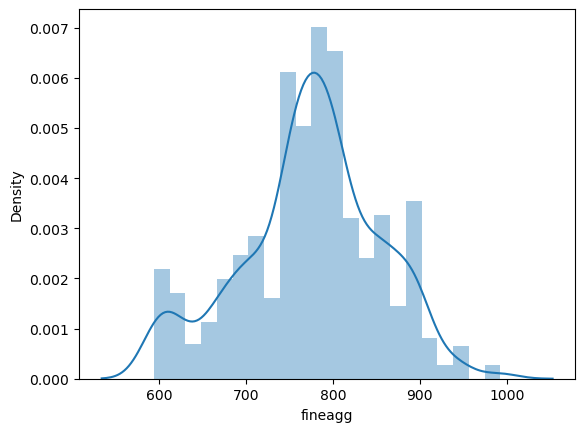

In [49]:
sns.distplot(df ['fineagg'], kde = True)
print("Fineagg's Skewness:", df ['fineagg'].skew())

In [50]:
df ['fineagg'].isnull().sum()

0

In [57]:
concrete_data['age'].value_counts() # AGE

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

In [51]:
age_25 = np.percentile(df ['age'], 25)
age_75 = np.percentile(df ['age'], 75)
iqr_age = age_75 - age_25

print("The first quartile Q1 is:", age_25)
print("The third quartile Q3 is:", age_75)
print("The interquartile range IQR is:", iqr_age)

The first quartile Q1 is: 7.0
The third quartile Q3 is: 56.0
The interquartile range IQR is: 49.0


The number of outliers in 'age' are: 59


<Axes: >

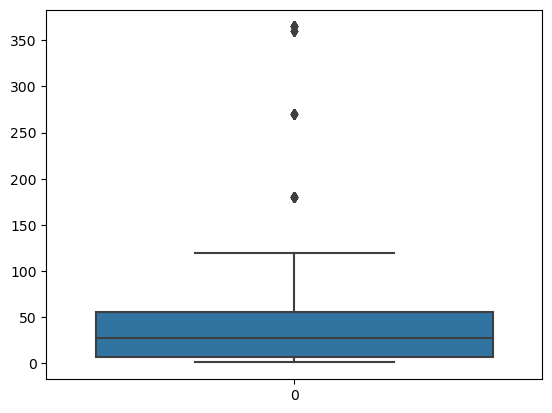

In [52]:
cutoff_age = 1.5 * iqr_age
low_age = age_25 - cutoff_age
up_age = age_75 + cutoff_age

outlier_age = [x for x in df ['age'] if x < low_age or x > up_age]
print("The number of outliers in 'age' are:", len(outlier_age))

sns.boxplot(df ['age'])

Age Skewness: 3.2691774006345895


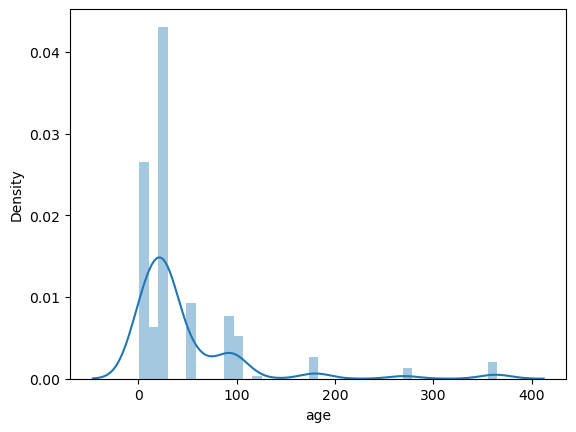

In [53]:
sns.distplot(df ['age'], kde = True)
print("Age Skewness:", df ['age'].skew())

In [54]:
df ['age'].isnull().sum()

0

#### BIVARIATE ANALYSIS

**VISUALIZING RELATIONSHIP BETWEEN THE INDEPENDENT VARIABLES**

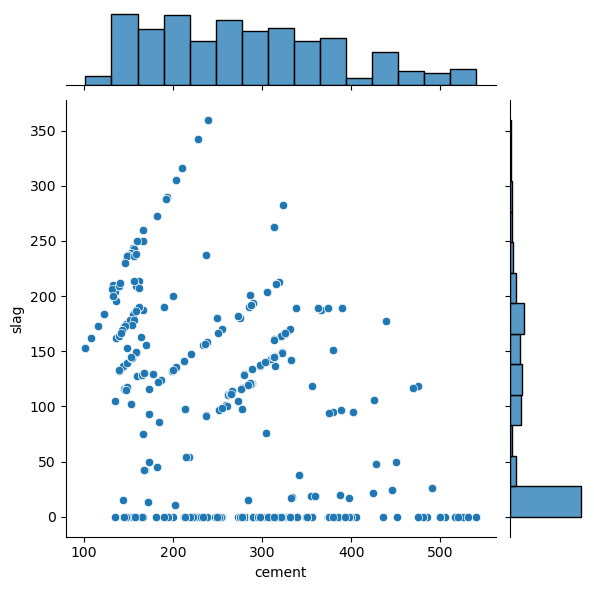

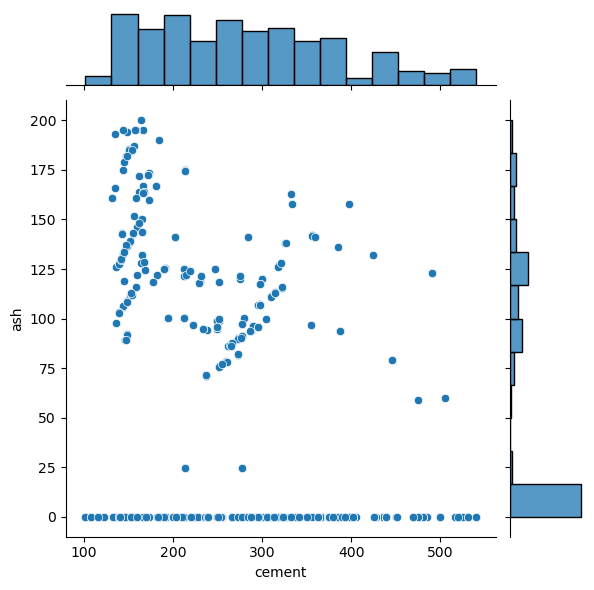

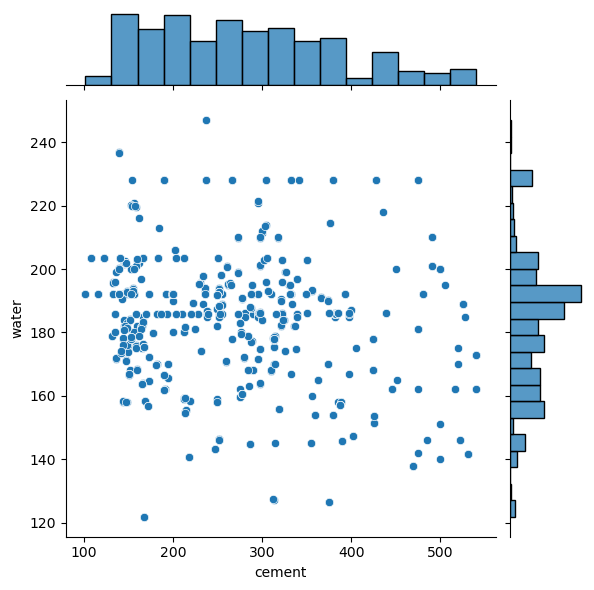

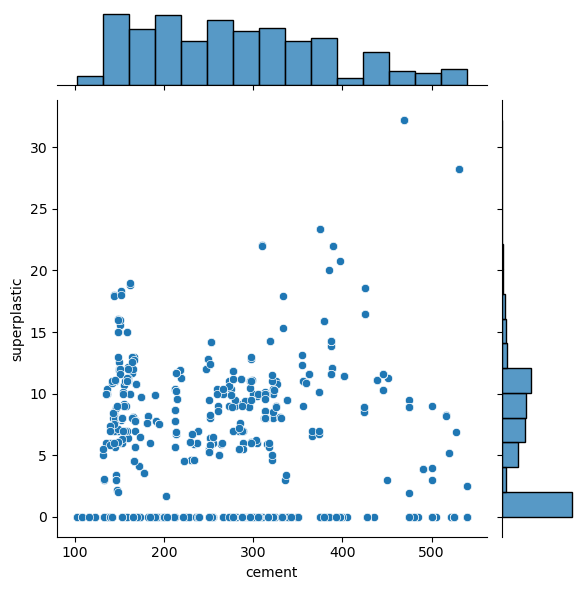

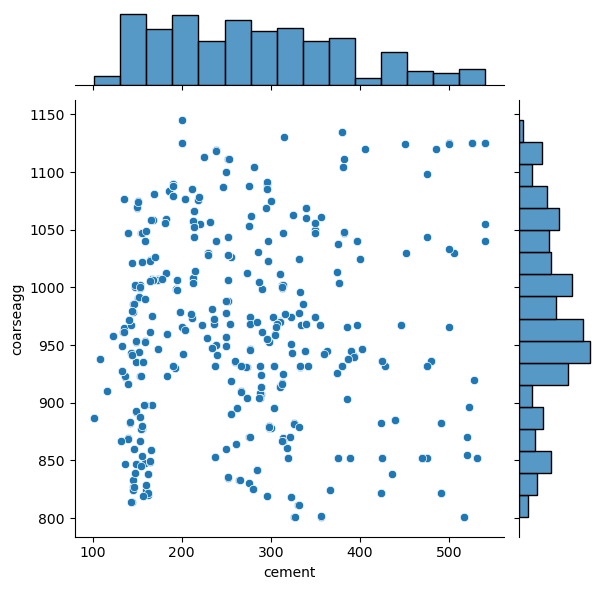

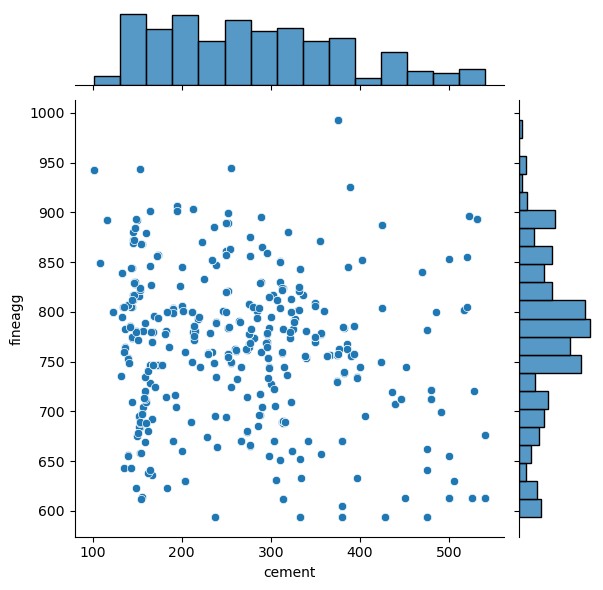

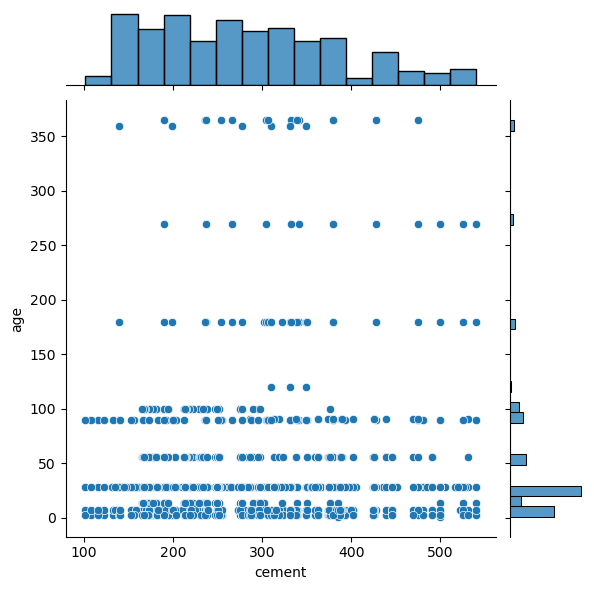

In [64]:
sns.jointplot(x = "cement", y = "slag", kind = "scatter", data = df)
sns.jointplot(x = "cement", y = "ash", kind = "scatter", data = df)
sns.jointplot(x = "cement", y = "water", kind = "scatter", data = df)
sns.jointplot(x = "cement", y = "superplastic", kind = "scatter", data = df)
sns.jointplot(x = "cement", y = "coarseagg", kind = "scatter", data = df)
sns.jointplot(x = "cement", y = "fineagg", kind = "scatter", data = df)
sns.jointplot(x = "cement", y = "age", kind = "scatter", data = df)
# RELATIONSHIP BETWEEN CEMENT AND OTHER VARIABLES
plt.show()

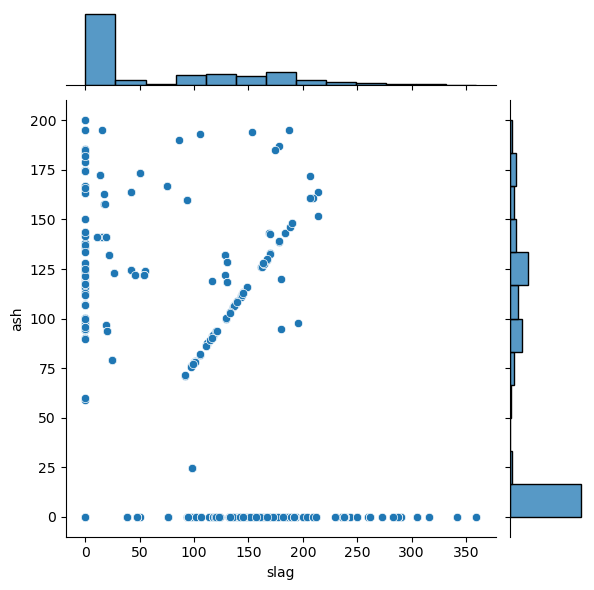

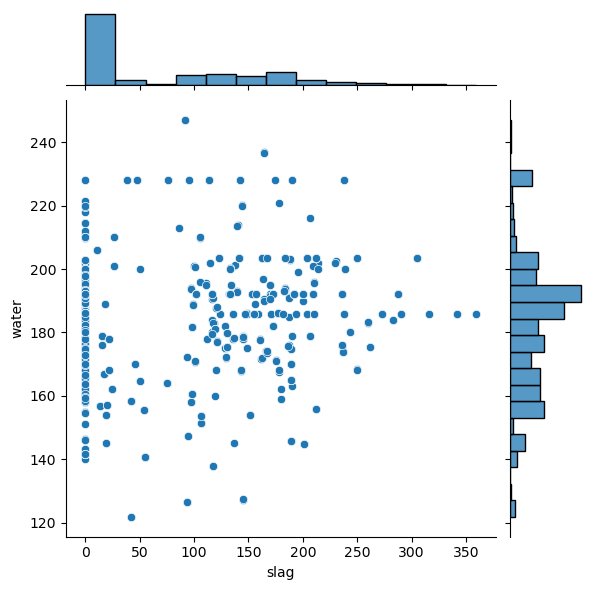

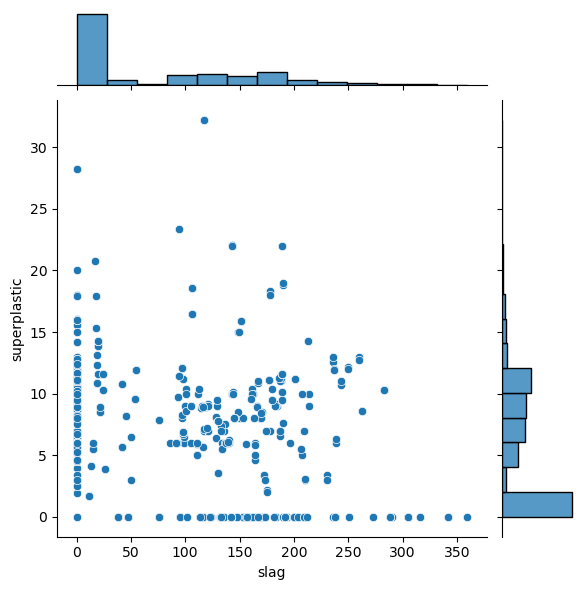

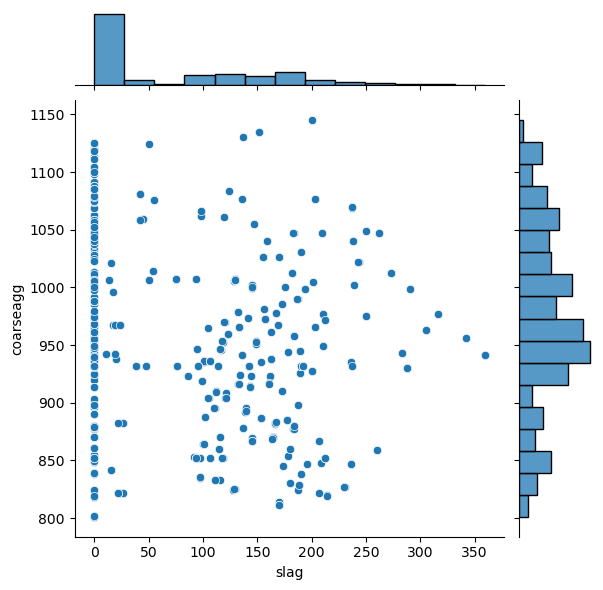

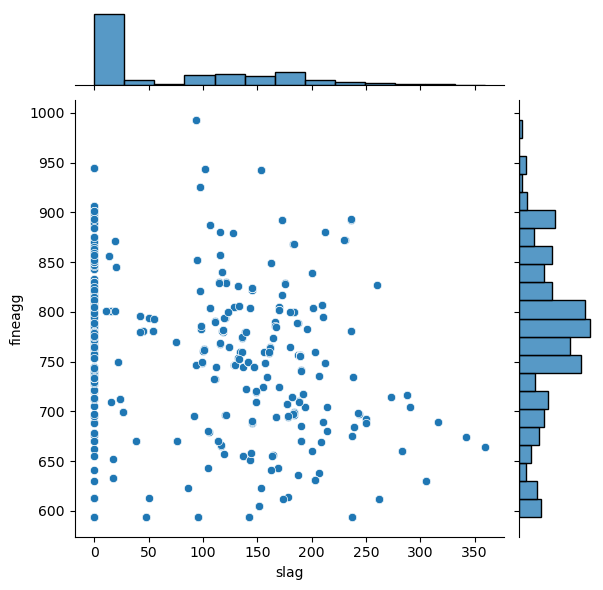

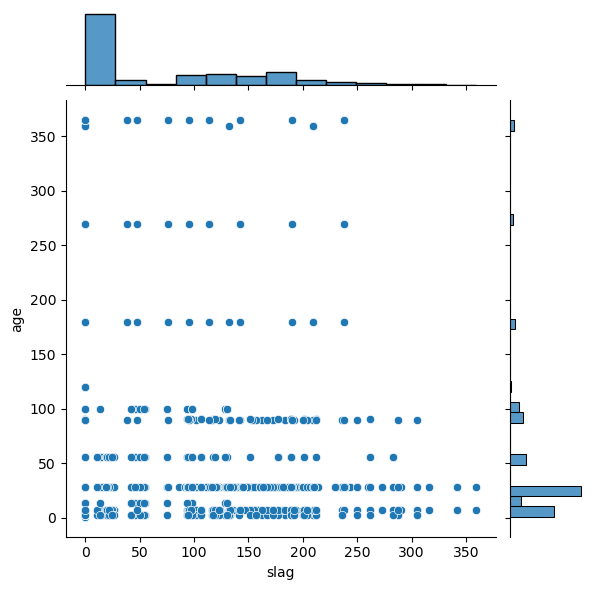

In [66]:
sns.jointplot(x = "slag", y = "ash", kind = "scatter", data = df)
sns.jointplot(x = "slag", y = "water", kind = "scatter", data = df)
sns.jointplot(x = "slag", y = "superplastic", kind = "scatter", data = df)
sns.jointplot(x = "slag", y = "coarseagg", kind = "scatter", data = df)
sns.jointplot(x = "slag", y = "fineagg", kind = "scatter", data = df)
sns.jointplot(x = "slag", y = "age", kind = "scatter", data = df)
# RELATIONSHIP BETWEEN SLAG AND OTHER VARIABLES
plt.show()

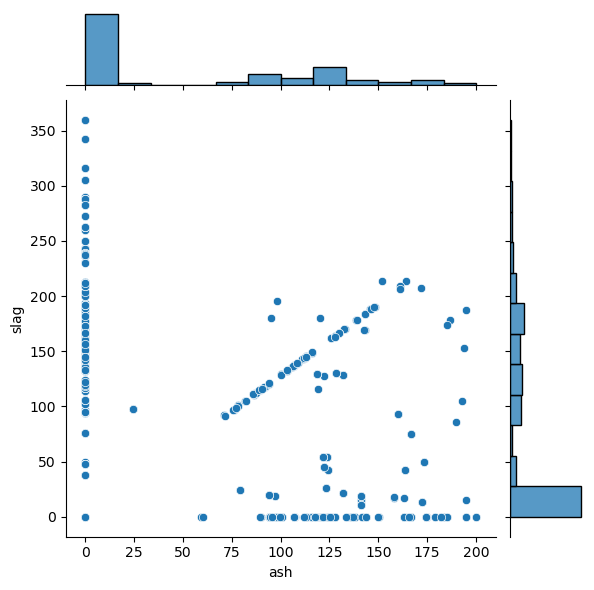

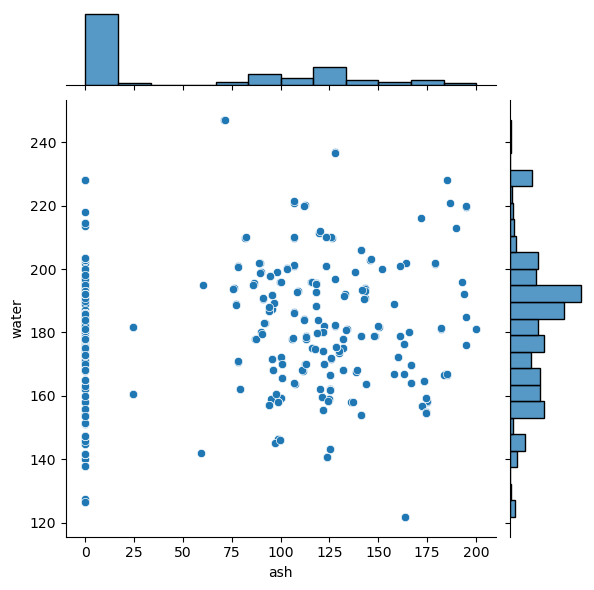

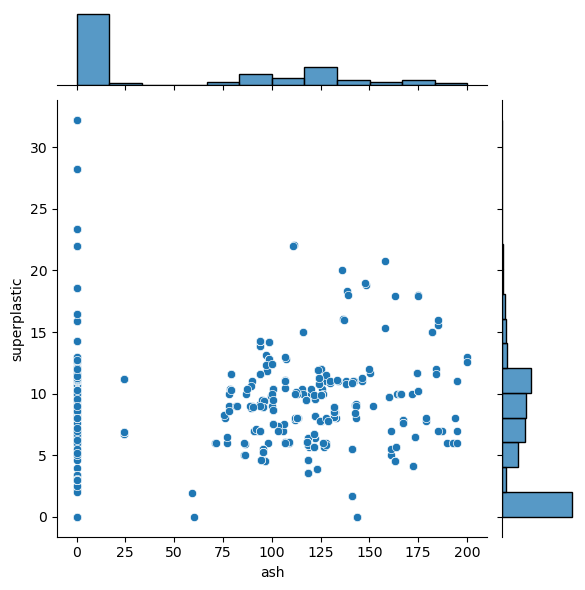

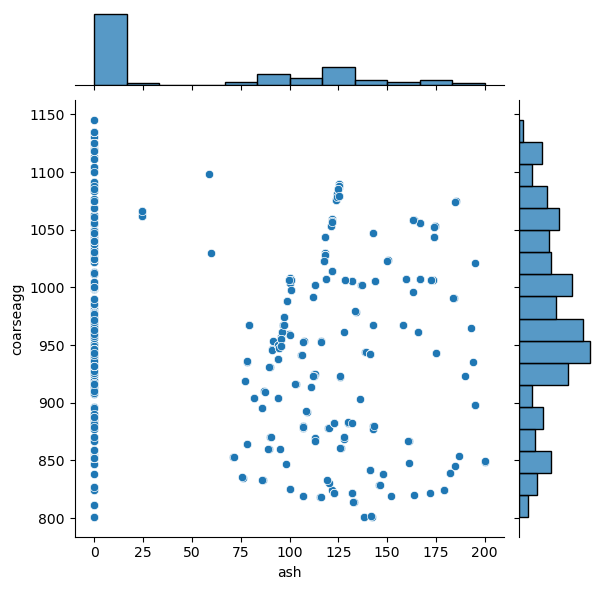

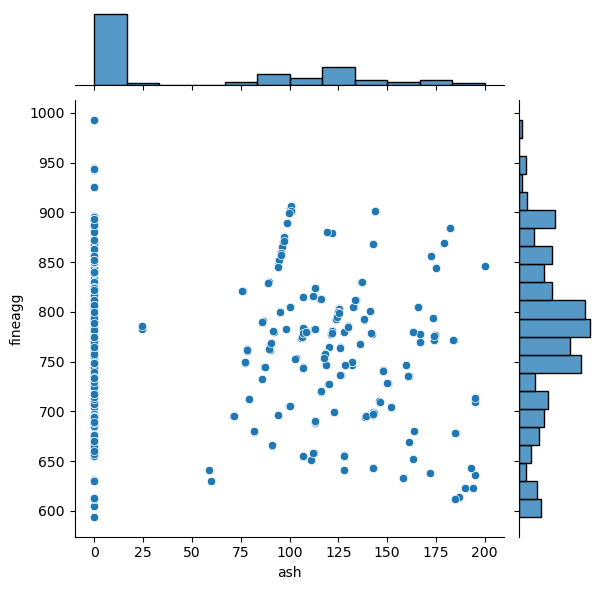

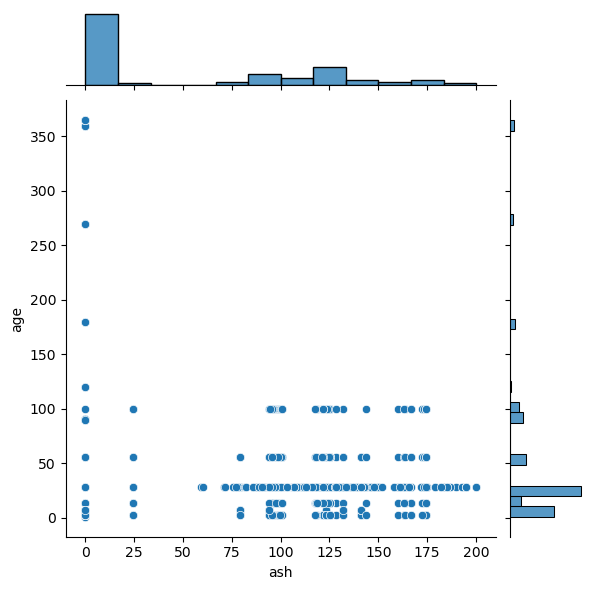

In [67]:
sns.jointplot(x = "ash", y = "slag", kind = "scatter", data = df)
sns.jointplot(x = "ash", y = "water", kind = "scatter", data = df)
sns.jointplot(x = "ash", y = "superplastic", kind = "scatter", data = df)
sns.jointplot(x = "ash", y = "coarseagg", kind = "scatter", data = df)
sns.jointplot(x = "ash", y = "fineagg", kind = "scatter", data = df)
sns.jointplot(x = "ash", y = "age", kind = "scatter", data = df)
# RELATIONSHIP BETWEEN ASH AND OTHER VARIABLES
plt.show()

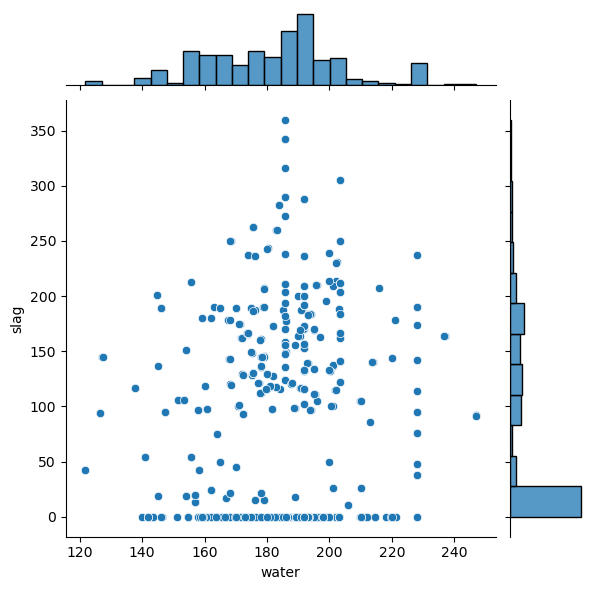

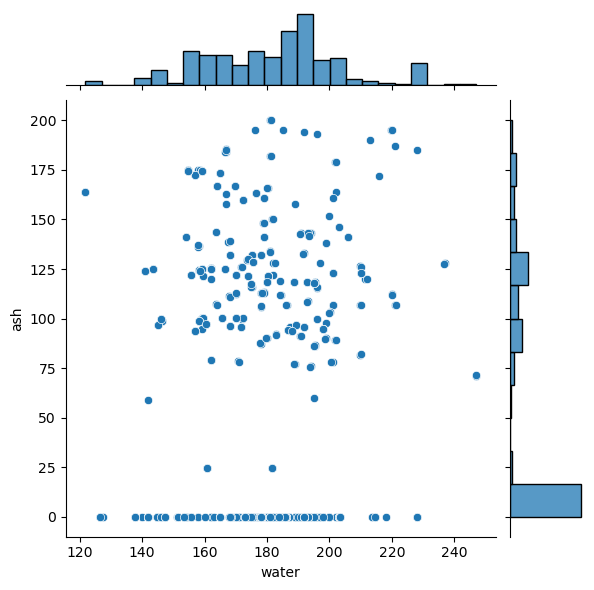

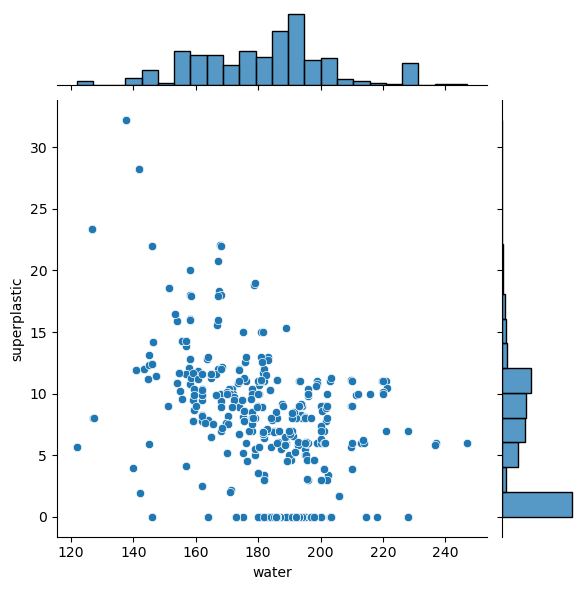

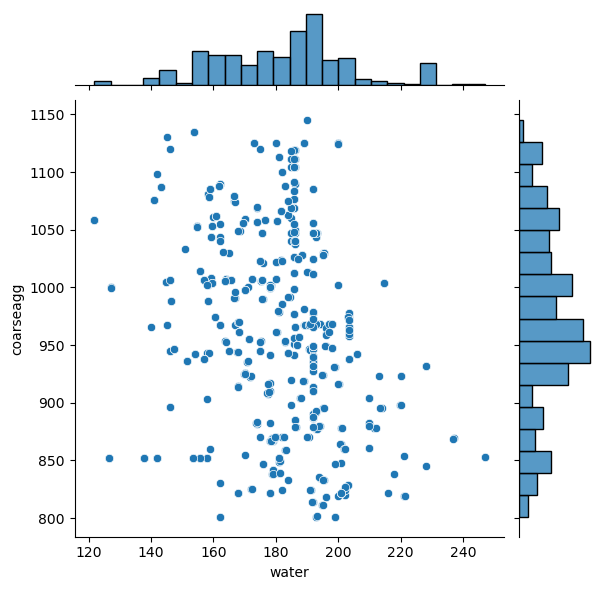

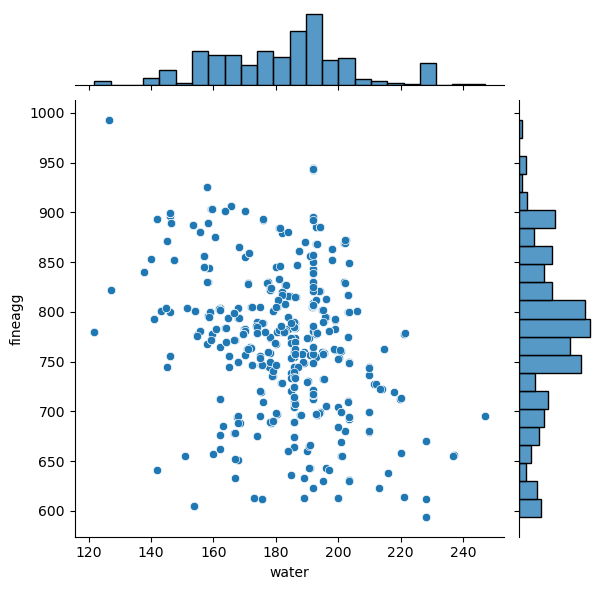

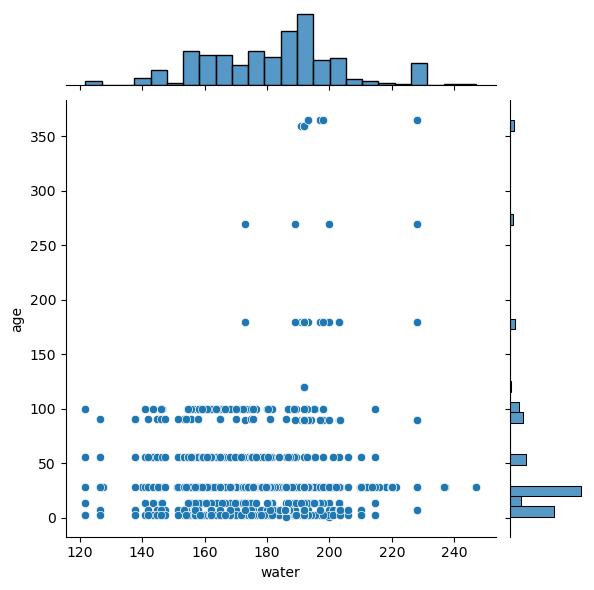

In [68]:
sns.jointplot(x = "water", y = "slag", kind = "scatter", data = df)
sns.jointplot(x = "water", y = "ash", kind = "scatter", data = df)
sns.jointplot(x = "water", y = "superplastic", kind = "scatter", data = df)
sns.jointplot(x = "water", y = "coarseagg", kind = "scatter", data = df)
sns.jointplot(x = "water", y = "fineagg", kind = "scatter", data = df)
sns.jointplot(x = "water", y = "age", kind = "scatter", data = df)
# RELATIONSHIP BETWEEN WATER AND OTHER VARIABLES
plt.show()

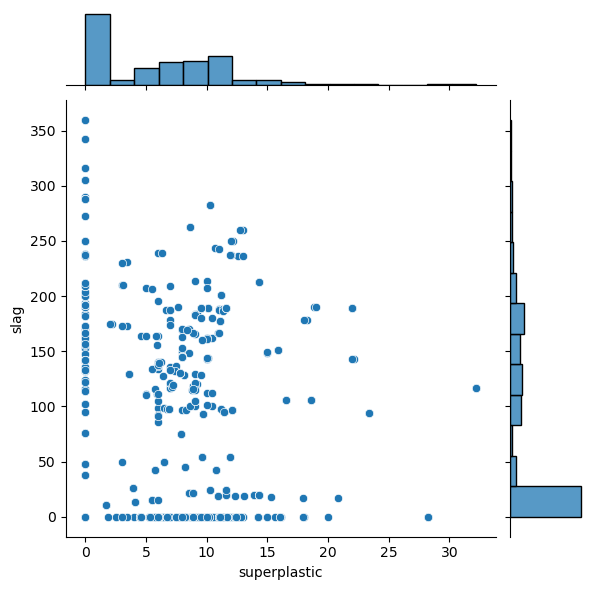

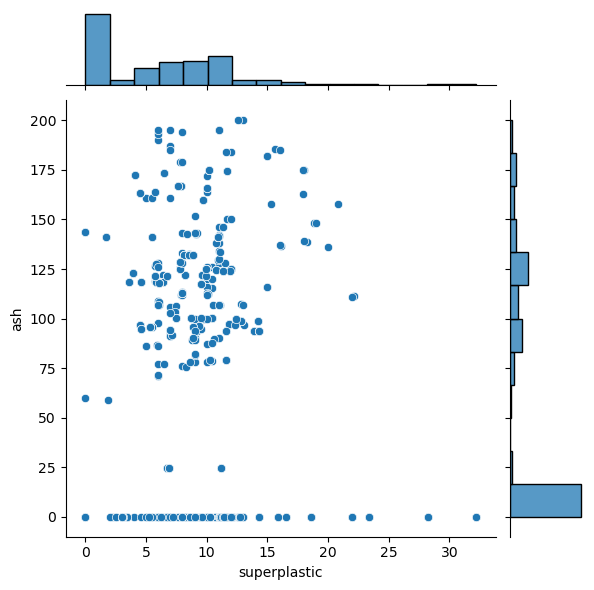

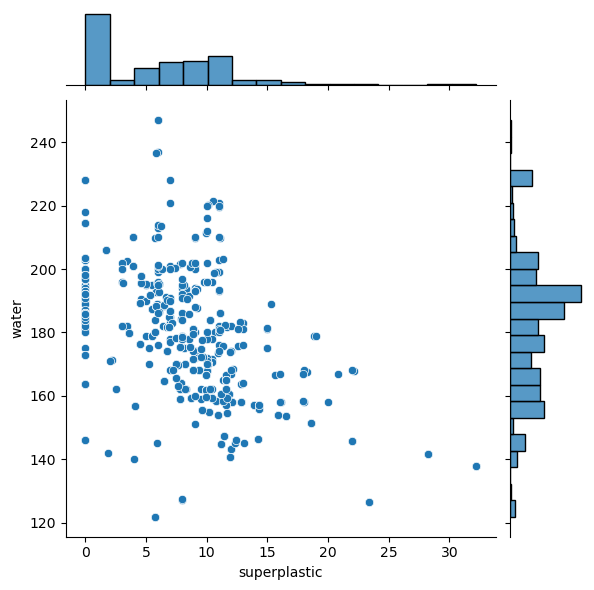

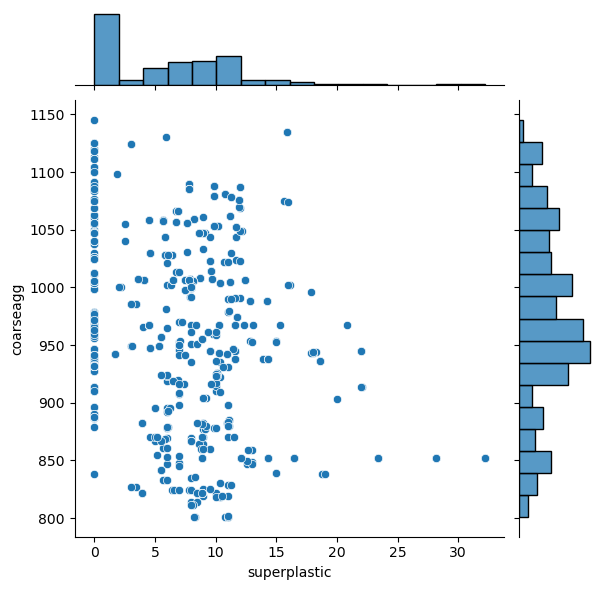

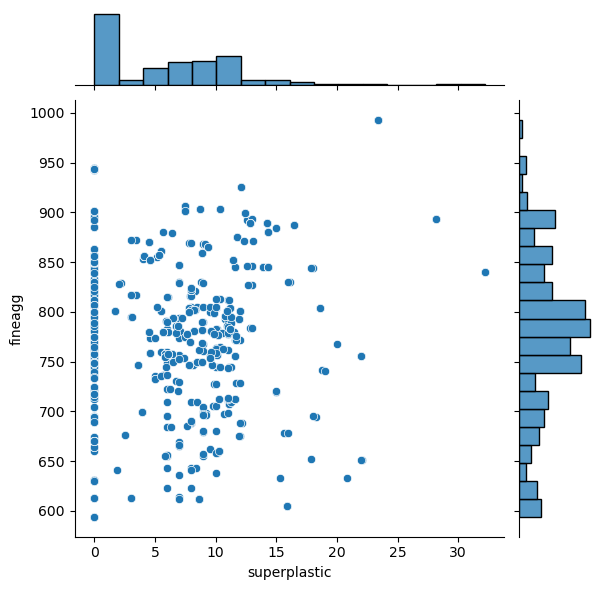

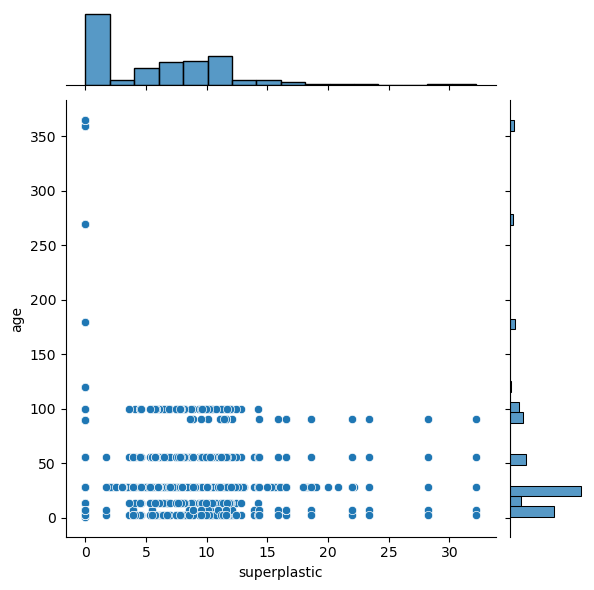

In [69]:
sns.jointplot(x = "superplastic", y = "slag", kind = "scatter", data = df)
sns.jointplot(x = "superplastic", y = "ash", kind = "scatter", data = df)
sns.jointplot(x = "superplastic", y = "water", kind = "scatter", data = df)
sns.jointplot(x = "superplastic", y = "coarseagg", kind = "scatter", data = df)
sns.jointplot(x = "superplastic", y = "fineagg", kind = "scatter", data = df)
sns.jointplot(x = "superplastic", y = "age", kind = "scatter", data = df)
# RELATIONSHIP BETWEEN SUPERPLASTIC AND OTHER VARIABLES
plt.show()

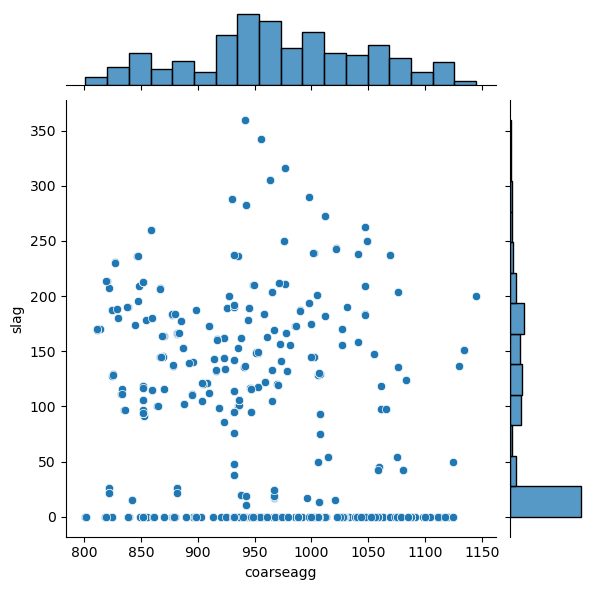

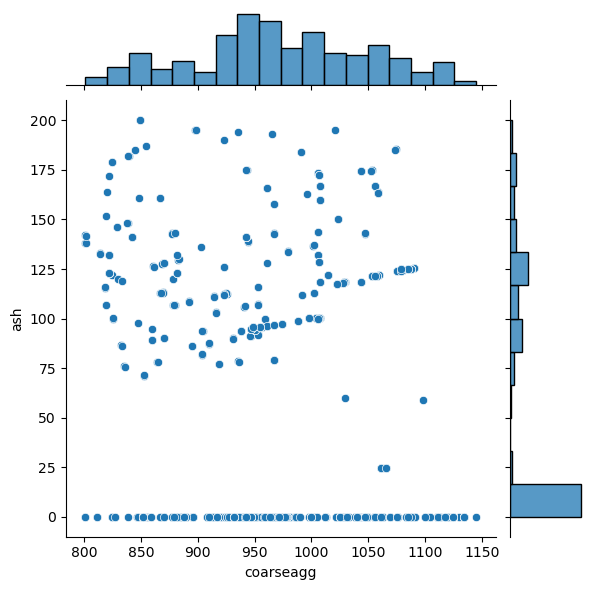

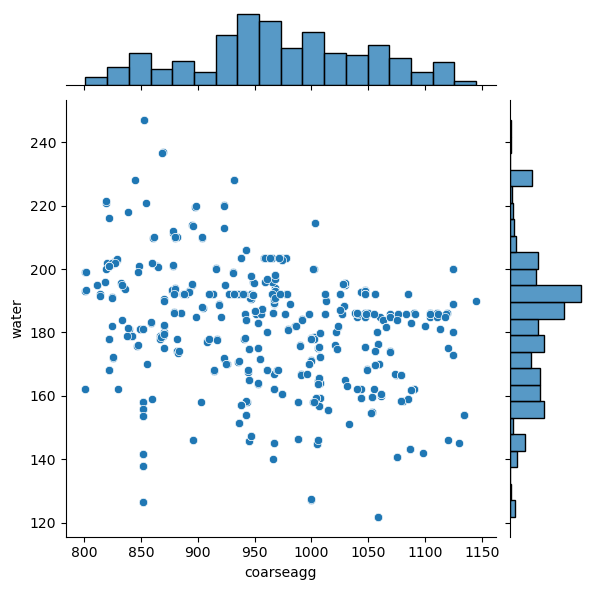

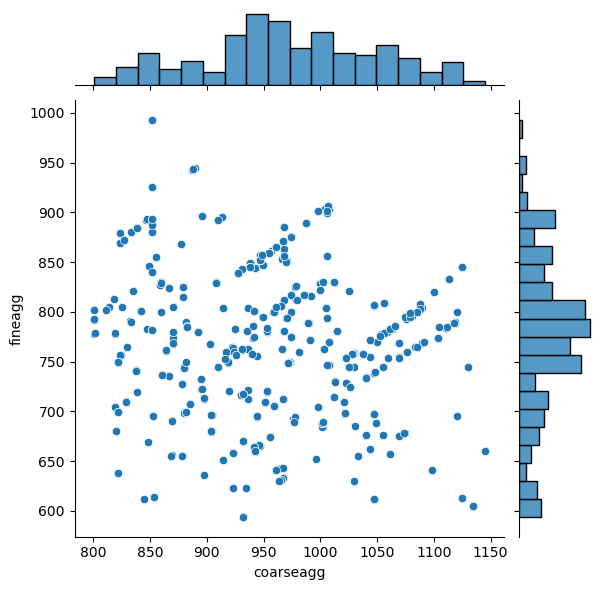

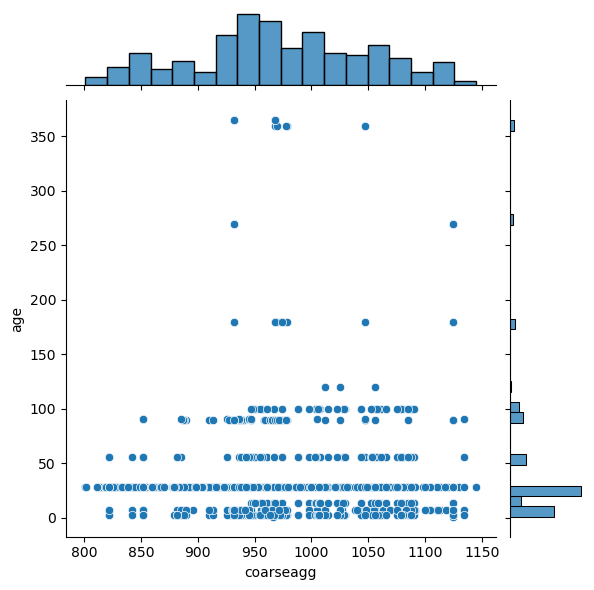

In [6]:
sns.jointplot(x = "coarseagg", y = "slag", kind = "scatter", data = df)
sns.jointplot(x = "coarseagg", y = "ash", kind = "scatter", data = df)
sns.jointplot(x = "coarseagg", y = "water", kind = "scatter", data = df)
sns.jointplot(x = "coarseagg", y = "fineagg", kind = "scatter", data = df)
sns.jointplot(x = "coarseagg", y = "age", kind = "scatter", data = df)
# RELATIONSHIP BETWEEN COARSEAGG AND OTHER VARIABLES
plt.show()

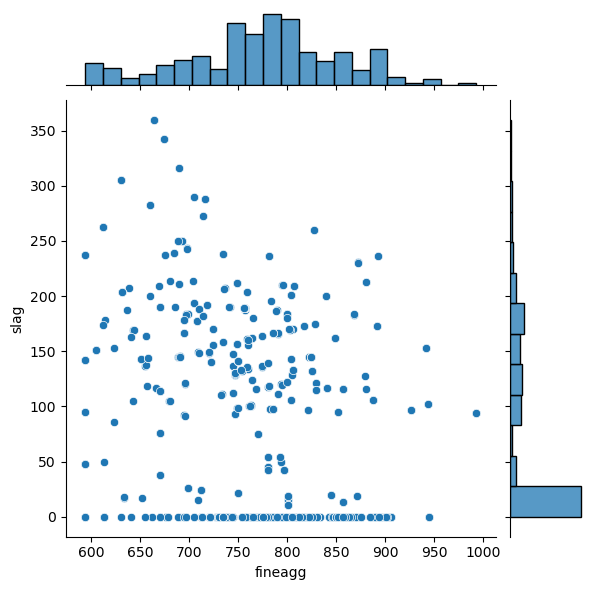

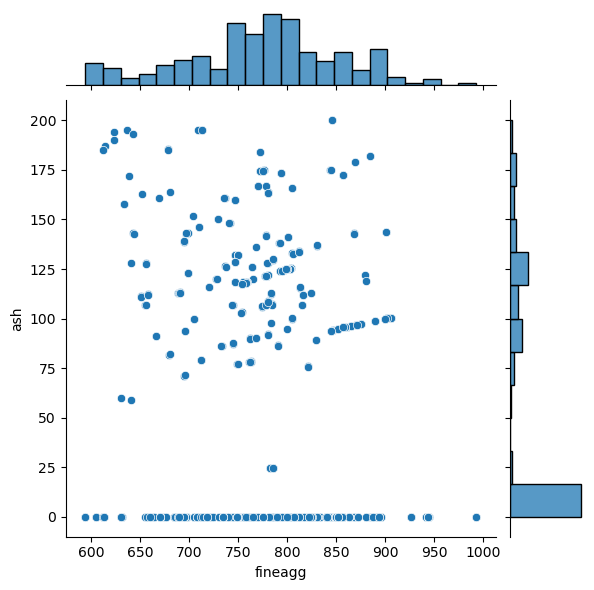

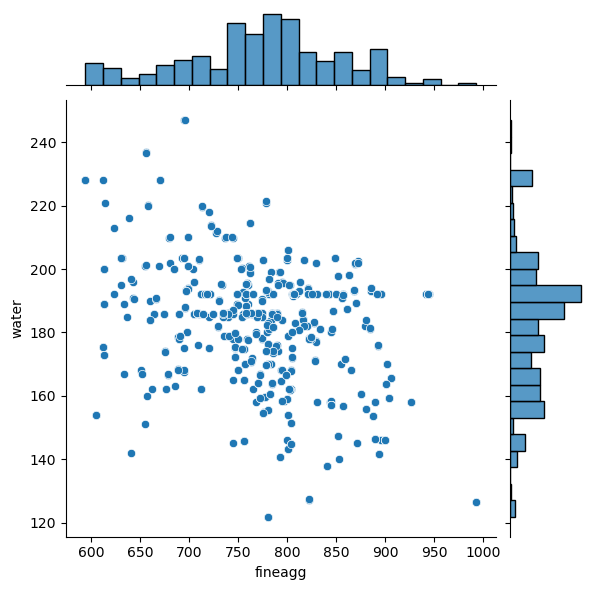

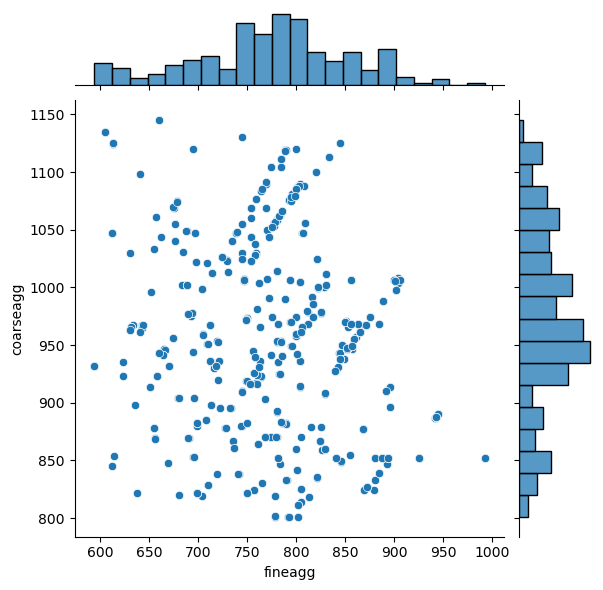

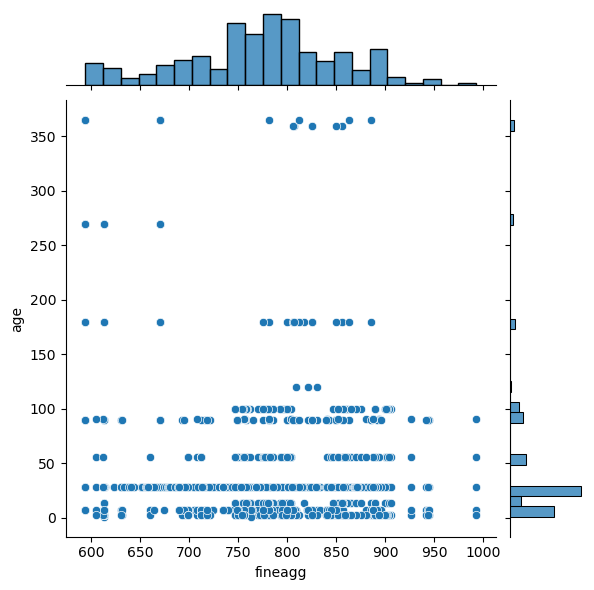

In [70]:
sns.jointplot(x = "fineagg", y = "slag", kind = "scatter", data = df)
sns.jointplot(x = "fineagg", y = "ash", kind = "scatter", data = df)
sns.jointplot(x = "fineagg", y = "water", kind = "scatter", data = df)
sns.jointplot(x = "fineagg", y = "coarseagg", kind = "scatter", data = df)
sns.jointplot(x = "fineagg", y = "age", kind = "scatter", data = df)
# RELATIONSHIP BETWEEN FINEAGG AND OTHER VARIABLES
plt.show()

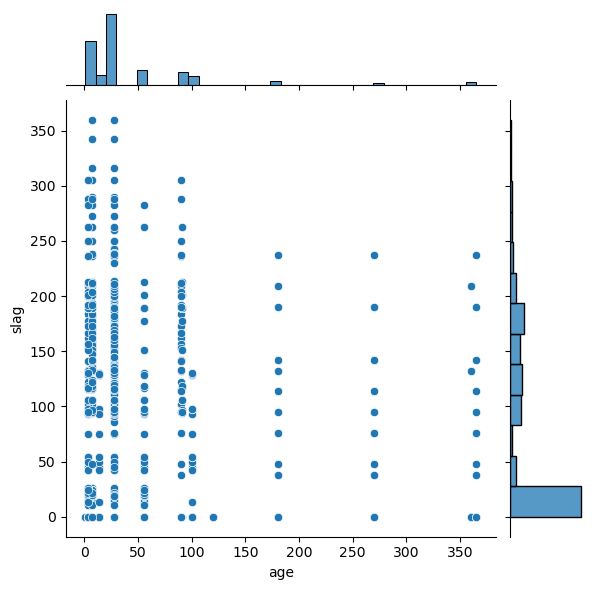

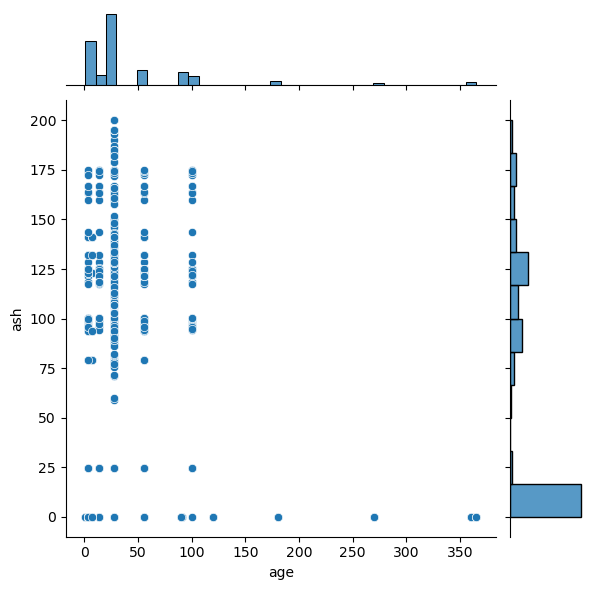

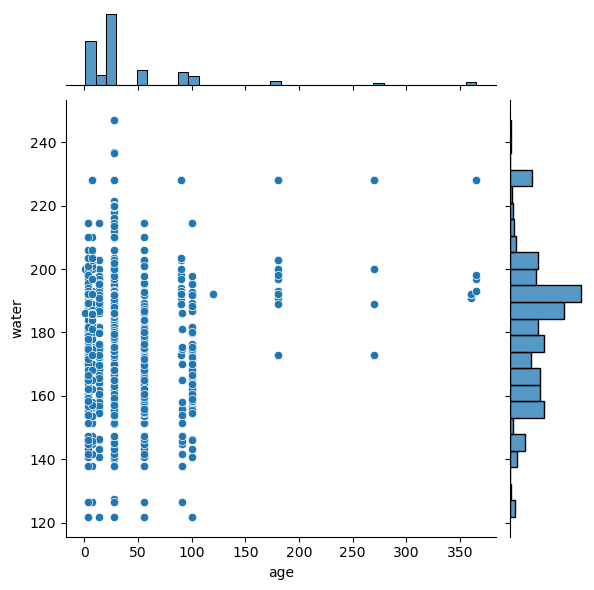

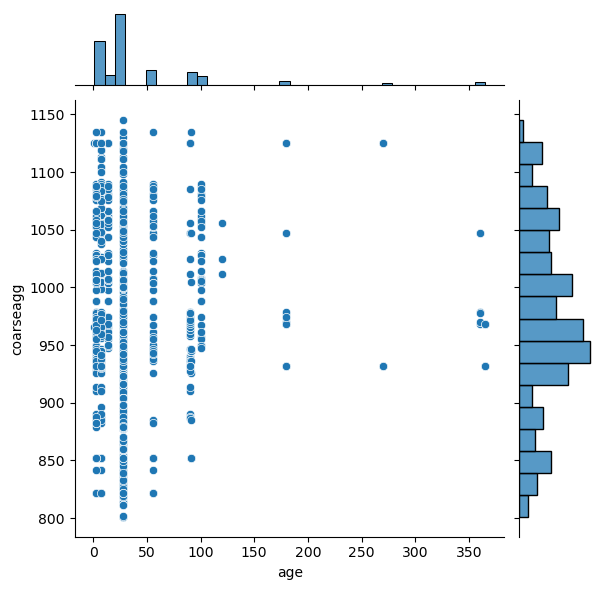

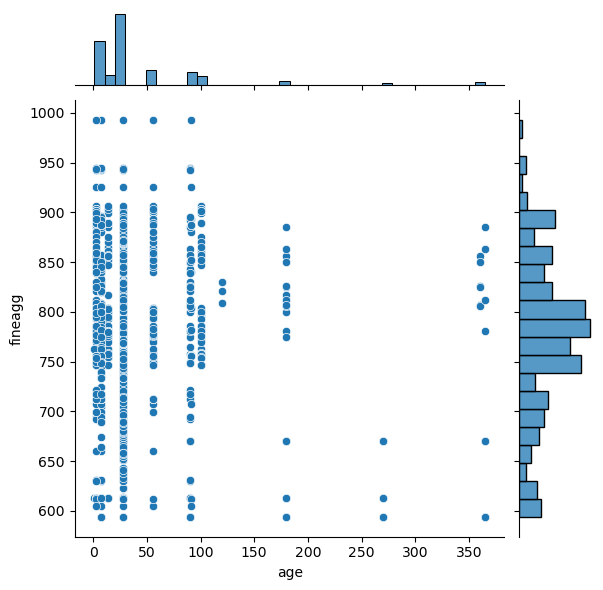

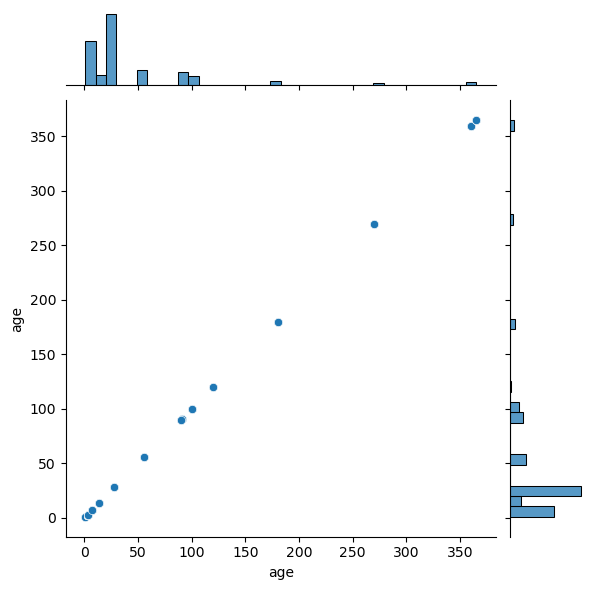

In [71]:
sns.jointplot(x = "age", y = "slag", kind = "scatter", data = df)
sns.jointplot(x = "age", y = "ash", kind = "scatter", data = df)
sns.jointplot(x = "age", y = "water", kind = "scatter", data = df)
sns.jointplot(x = "age", y = "coarseagg", kind = "scatter", data = df)
sns.jointplot(x = "age", y = "fineagg", kind = "scatter", data = df)
sns.jointplot(x = "age", y = "age", kind = "scatter", data = df)
# RELATIONSHIP BETWEEN AGE AND OTHER VARIABLES
plt.show()

<Axes: xlabel='strength', ylabel='Density'>

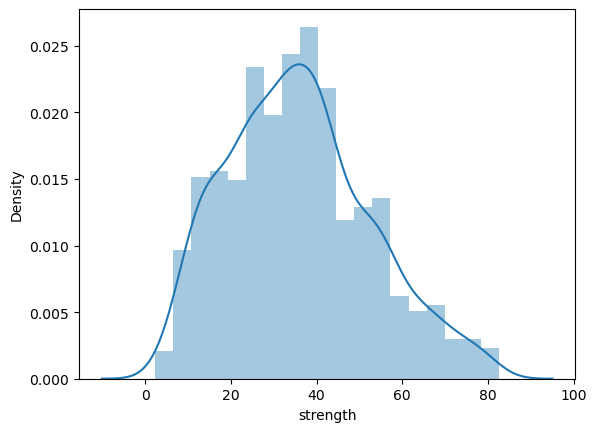

In [72]:
# plotting of 'Strength':
sns.distplot(df['strength'])

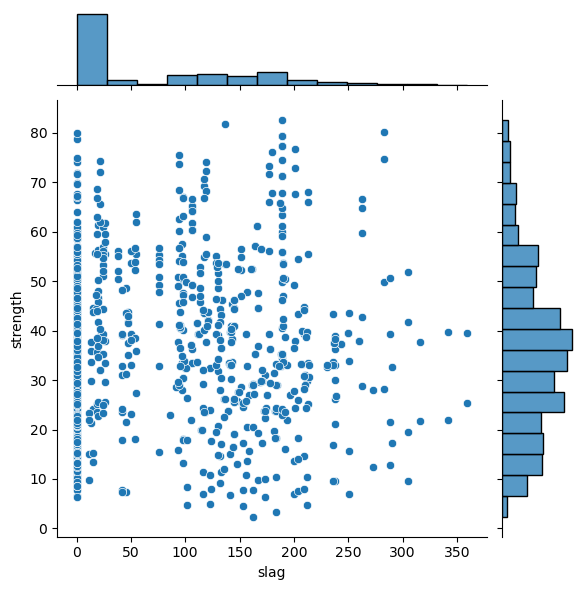

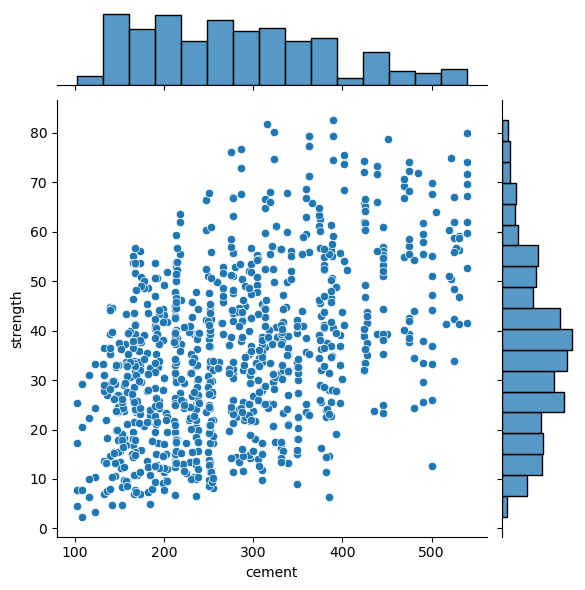

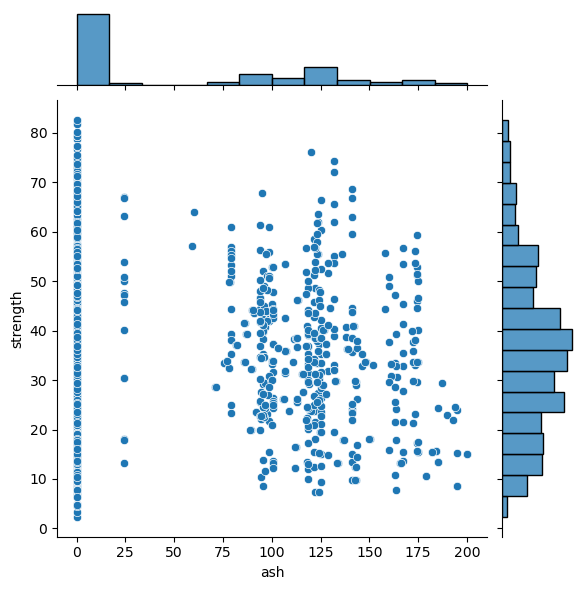

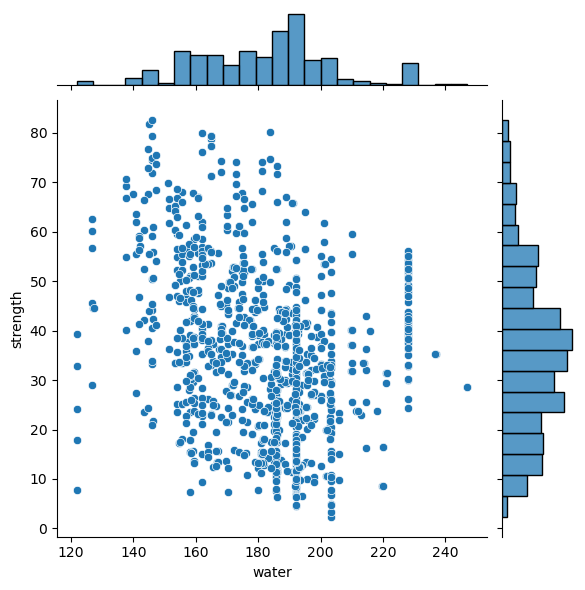

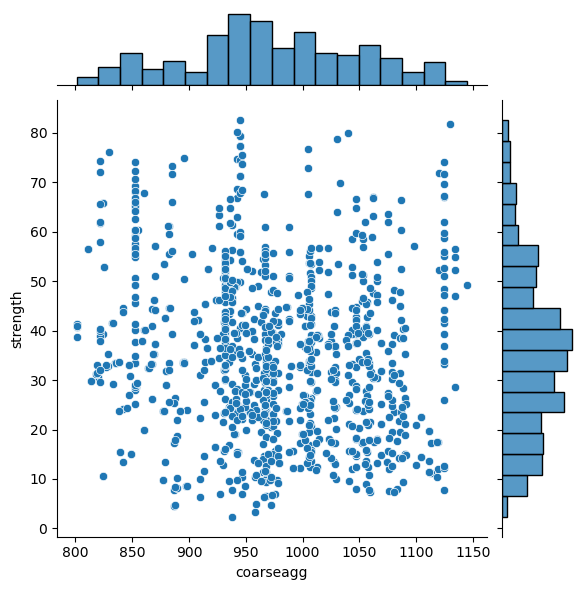

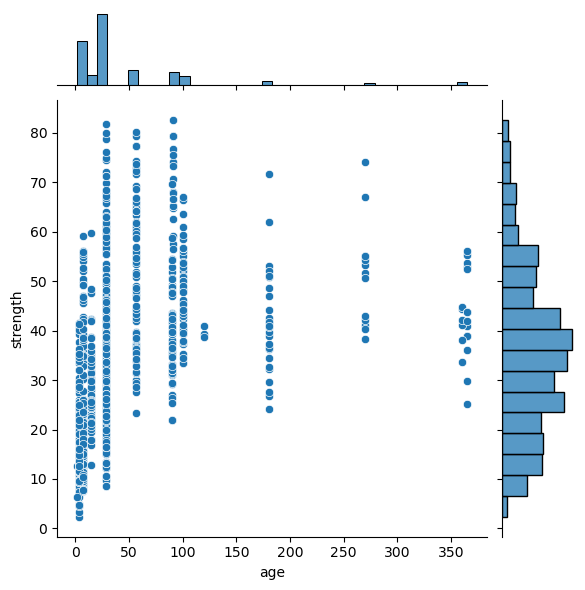

In [73]:
sns.jointplot(y = "strength", x = "slag", kind = "scatter", data = df)
sns.jointplot(y = "strength", x = "cement", kind = "scatter", data = df)
sns.jointplot(y = "strength", x = "ash", kind = "scatter", data = df)
sns.jointplot(y = "strength", x = "water", kind = "scatter", data = df)
sns.jointplot(y = "strength", x = "coarseagg", kind = "scatter", data = df)
sns.jointplot(y = "strength", x = "age", kind = "scatter", data = df)
# RELATIONSHIP BETWEEN STRENGTH AND OTHER VARIABLES
plt.show()

#### OUTLIERS TREATMENT

In [75]:
for col_name in df.columns[:-1]:
    iq_25 = df[col_name].quantile(0.25)
    iq_75 = df[col_name].quantile(0.75)
    iqr = iq_75 - iq_25
    cut_off = 1.5 * iqr
    low_lim = iq_25 - cut_off
    up_lim = iq_75 + cut_off
    
    df.loc[(df [col_name] < low_lim) | (df [col_name] > up_lim), col_name] = df [col_name].median()

<Axes: >

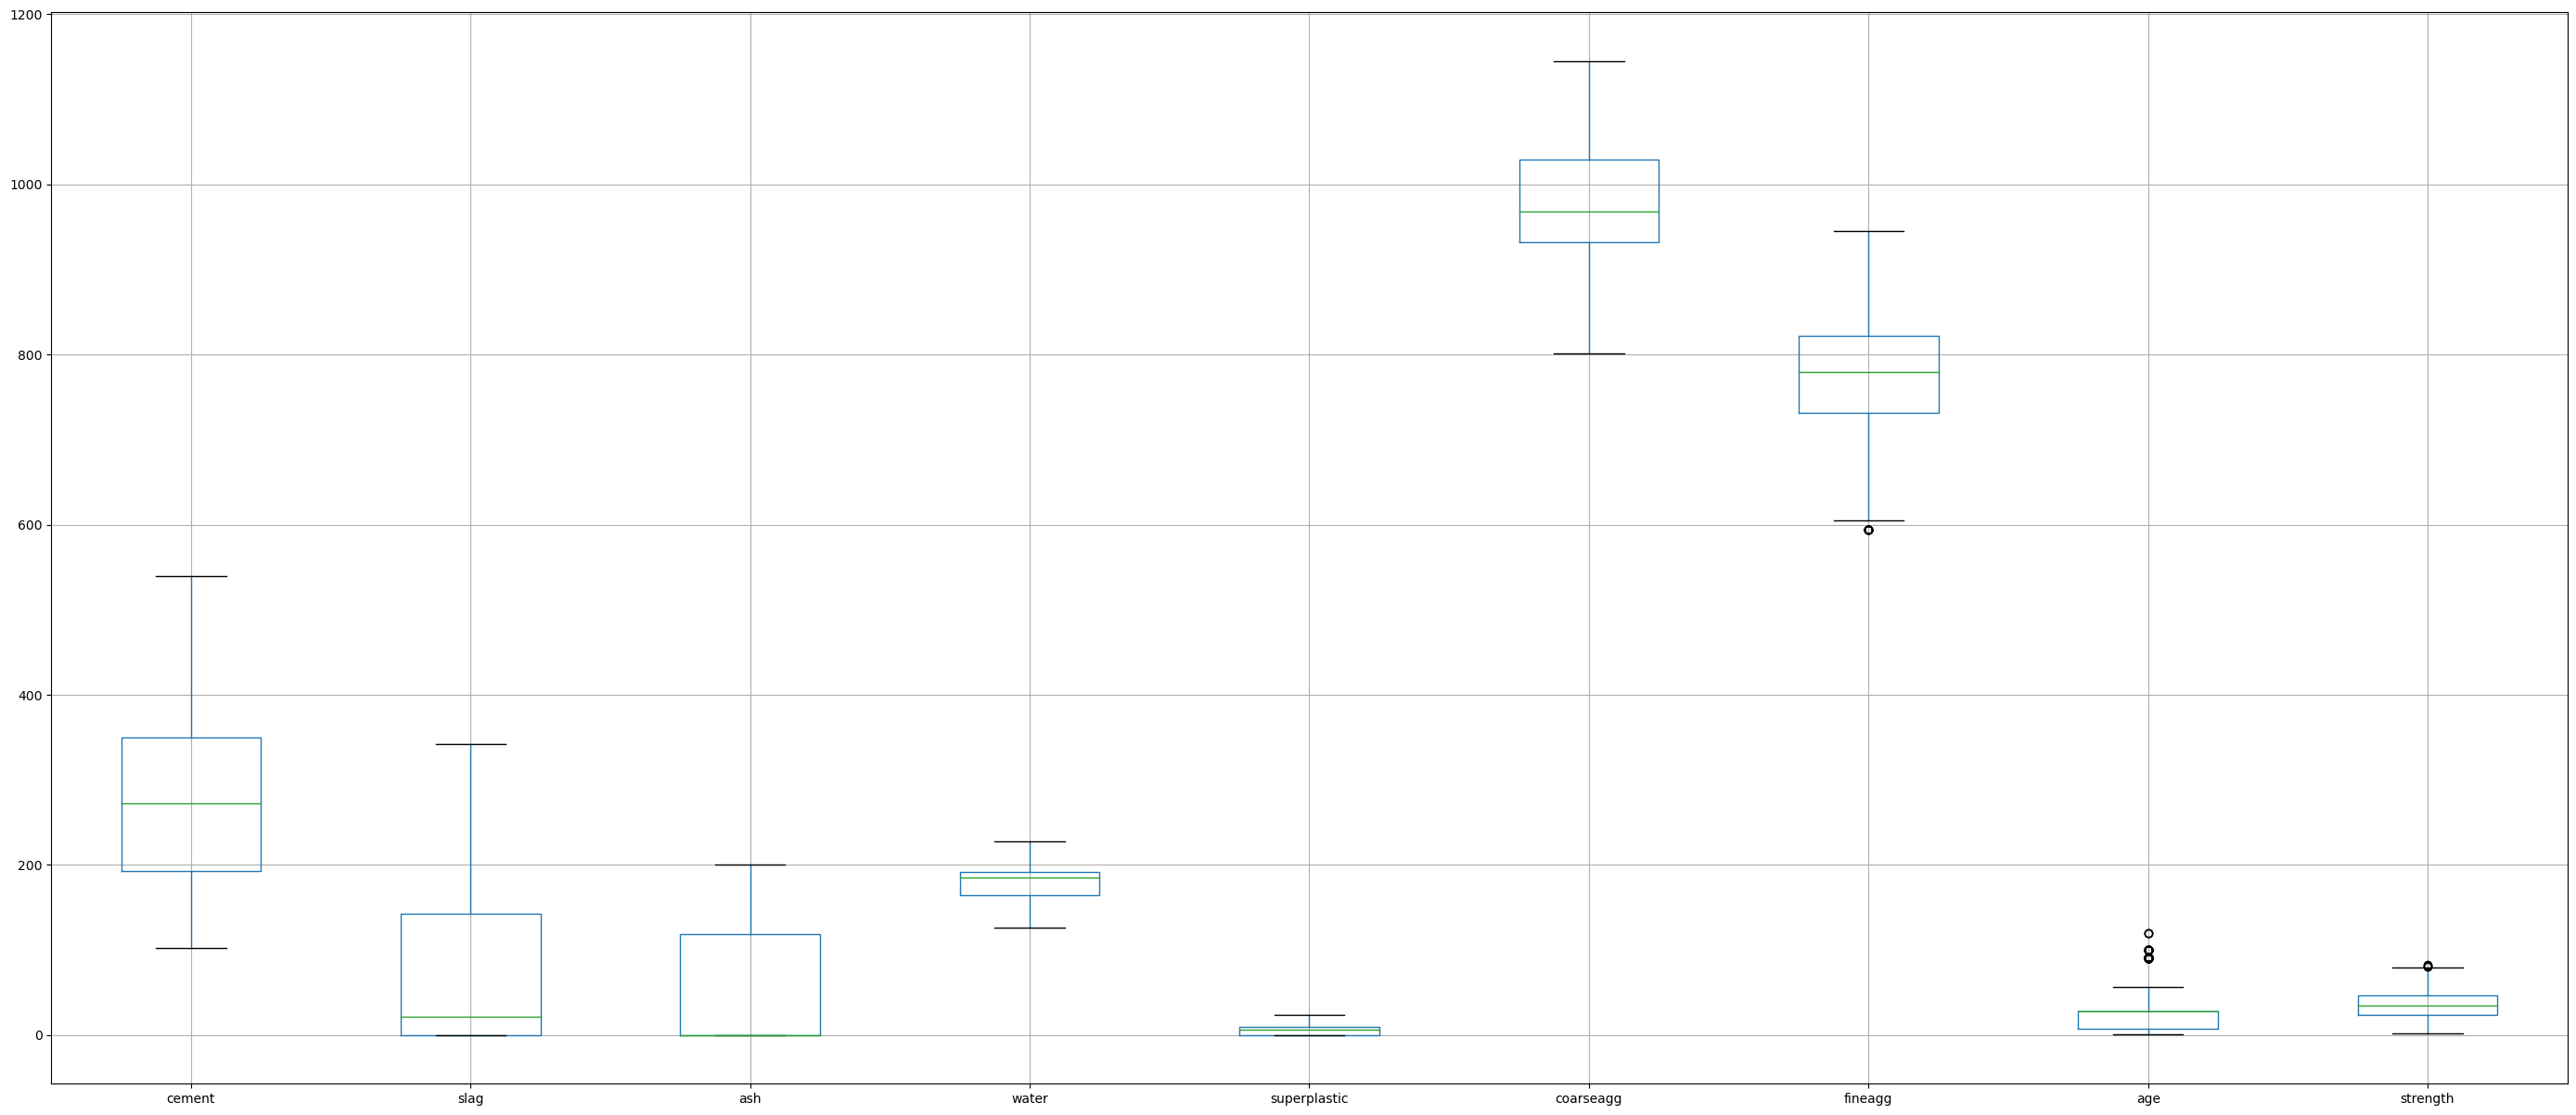

In [76]:
df.boxplot(figsize = (35,15))

#### FEATURE ENGINEERING

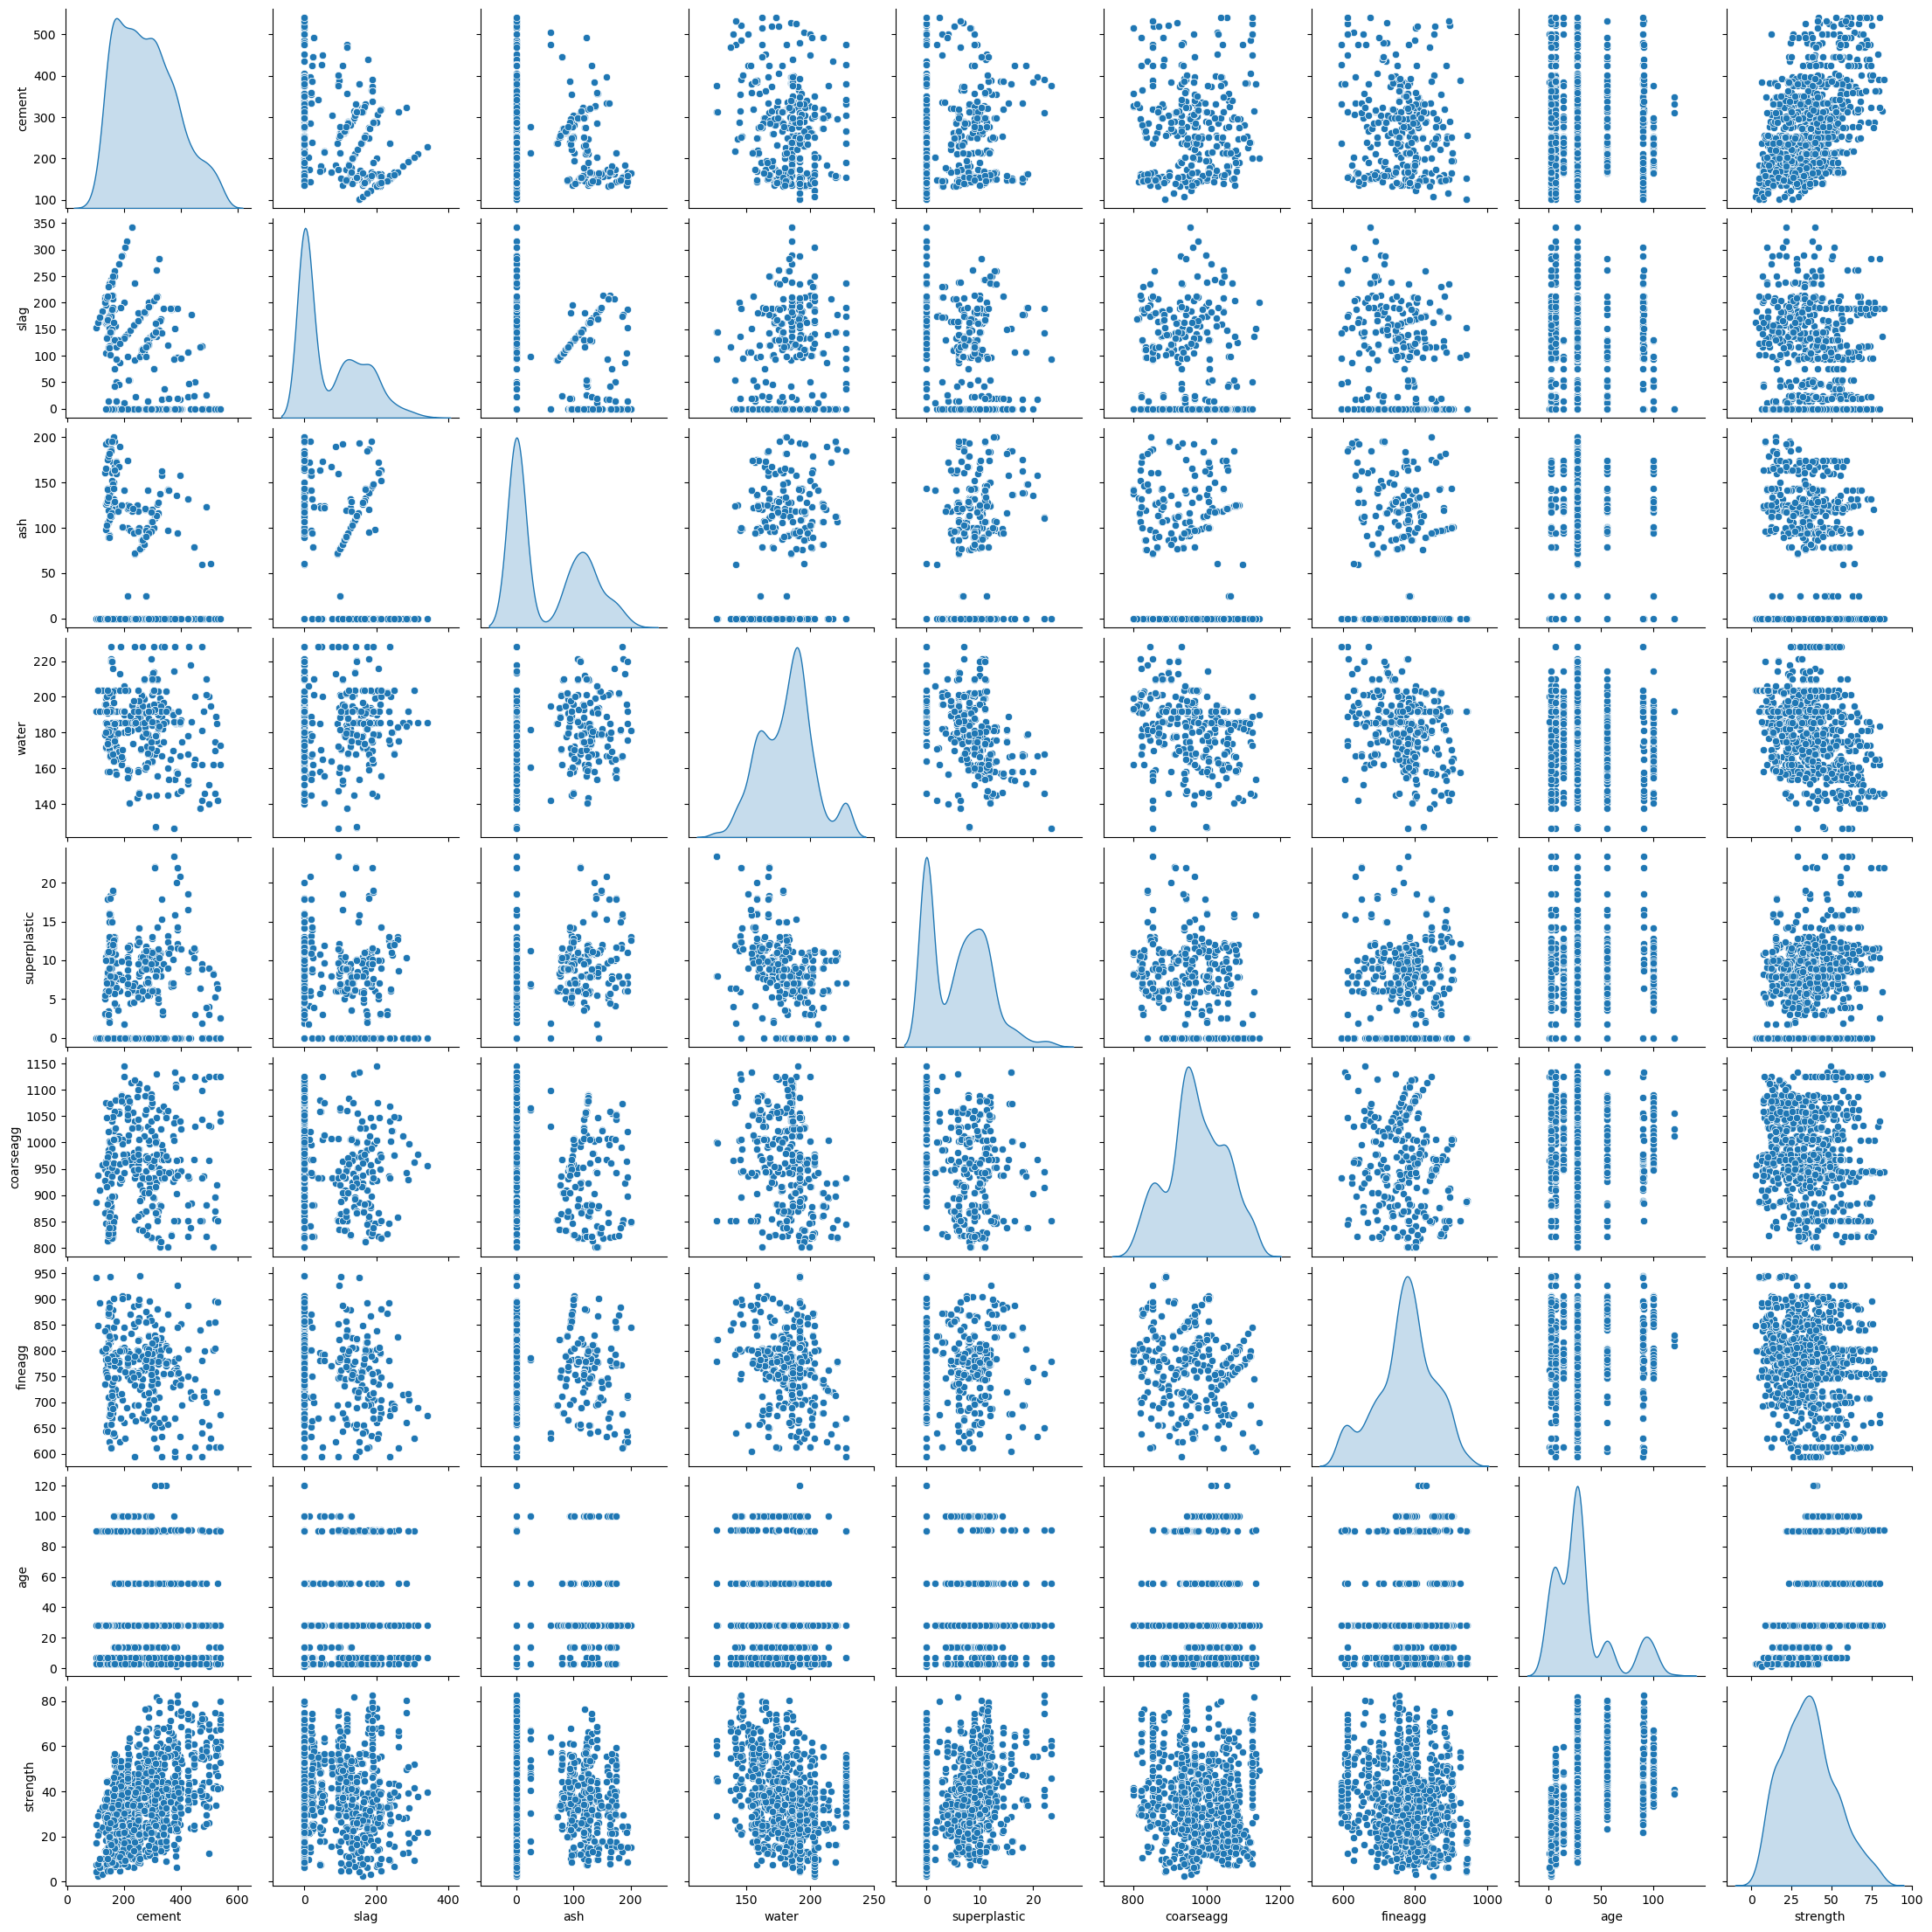

In [81]:
sns.pairplot(df , diag_kind = 'kde')
plt.show()

In [11]:
corr = df.corr()
corr

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

(9.5, -0.5)

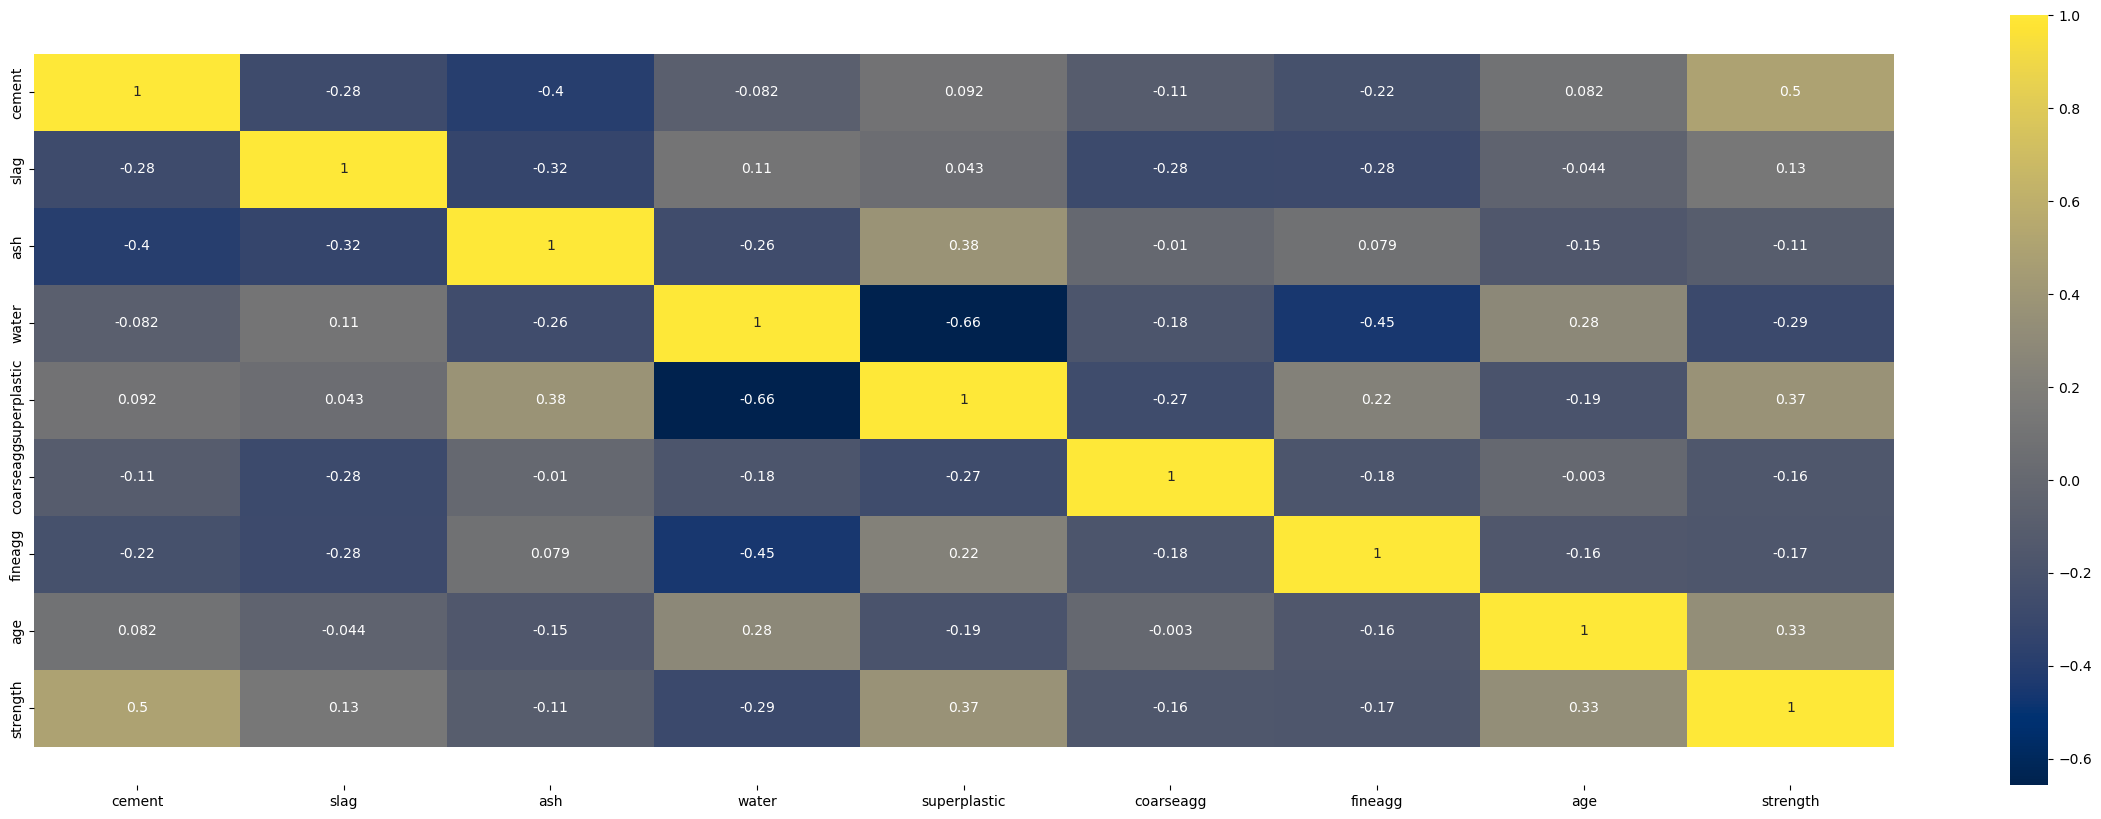

In [12]:
# plotting a heatmap
plt.figure(figsize = (30,10))
ax = sns.heatmap(corr, annot = True, cmap = "cividis")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### MODEL TRAINING

In [43]:
X = df.drop('strength', axis = 1)
y = df ['strength']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [45]:
print('The size of training dataset:', (X_train.shape) ,'and:', (y_train.shape))
print('The size of test dataset:', (X_test.shape) ,'and', (y_test.shape))

The size of training dataset: (721, 8) and: (721,)
The size of test dataset: (309, 8) and (309,)


#### Scaling of the features

In [46]:
scaled_X_train = X_train.copy()
scaled_X_test = X_test.copy()
num_cols = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']
## As all the predictors in the same scale apart from age, so we will scale the datasets.
for i in num_cols:
    scale = StandardScaler().fit(scaled_X_train[[i]])
    scaled_X_train[i] = scale.transform(scaled_X_train[[i]])
    scaled_X_test[i] = scale.transform(scaled_X_test[[i]])

##### Polynomial Featurization

Best degree 3 with RMSE 6.155266223306582


Text(0, 0.5, 'RMSE')

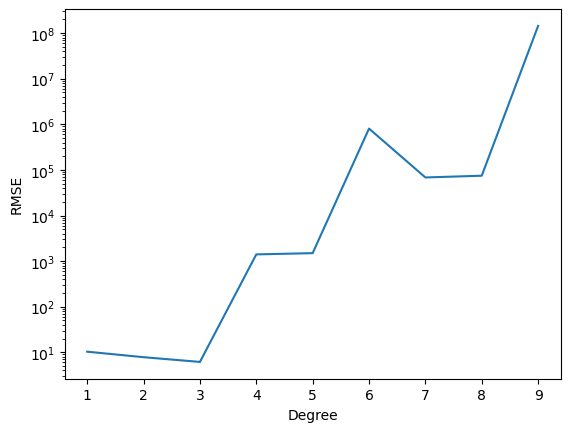

In [51]:
rmses = []
degrees = np.arange(1,10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:
    poly_features = PolynomialFeatures(degree = deg, include_bias = False)
    poly_X_train = poly_features.fit_transform(scaled_X_train)
    
    poly_reg = LinearRegression()
    poly_reg.fit(poly_X_train, y_train)
    
    poly_X_test = poly_features.fit_transform(scaled_X_test)
    poly_predict = poly_reg.predict(poly_X_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg
        
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [52]:
poly = PolynomialFeatures(degree = 3) # For degree = 3, Linear Regression yields the best accuracy as it is giving the least error.
poly_X_train = poly.fit_transform(scaled_X_train)
poly_X_test = poly.transform(scaled_X_test)

##### Linear Regression

In [53]:
lin_model_poly = LinearRegression()
lin_model_poly.fit(poly_X_train, y_train)

LinearRegression()

In [ ]:
pred_lin_poly = lin_model_poly.predict(poly_X_test)
print('Accuracy of training data using Linear Regression:', lin_model_poly.score(poly_X_train, y_train))
print('Accuracy of testing data using Linear Regression:', lin_model_poly.score(poly_X_test, y_test))
acc_lin_poly = metrics.r2_score(y_test, pred_lin_poly)
print('Accuracy for Linear Regression Model:', acc_lin_poly)
mse_lin_poly = metrics.mean_squared_error(y_test, pred_lin_poly)
print('MSE:', mse_lin_poly)
rmse_lin_poly = np.sqrt(metrics.mean_squared_error(y_test, pred_lin_poly))
print('RMSE:', rmse_lin_poly)

##### Ridge Regression

In [54]:
ridge = Ridge(alpha = 0.3)
ridge.fit(poly_X_train, y_train)

Ridge(alpha=0.3)

In [22]:
pred_ridge = ridge.predict(poly_X_test)
print('Accuracy of training data using Ridge Regression:', ridge.score(poly_X_train, y_train))
print('Accuracy of test data using Ridge Regression:', ridge.score(poly_X_test, y_test))
acc_ridge = metrics.r2_score(y_test, pred_ridge)
print('Accuracy using Ridge Regression:', acc_ridge)
mse_ridge = metrics.mean_squared_error(y_test, pred_ridge)
print('MSE:', mse_ridge)
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', rmse_ridge)

Accuracy of training data using Ridge Regression: 0.9284278995061289
Accuracy of test data using Ridge Regression: 0.8766596975347406
Accuracy using Ridge Regression: 0.8766596975347406
MSE: 35.89690723708871
RMSE: 5.991402777070551


##### Lasso Regression

In [55]:
lasso = Lasso(alpha = 0.01)
lasso.fit(poly_X_train, y_train)

Lasso(alpha=0.01)

In [24]:
pred_lasso = lasso.predict(poly_X_test)
print('Accuracy of training data using Lasso Regression:', lasso.score(poly_X_train, y_train))
print('Accuracy of test data using Lasso Regression:', lasso.score(poly_X_test, y_test))
acc_lasso = metrics.r2_score(y_test, pred_lasso)
print('Accuracy on Lasso Regression:', acc_lasso)
mse_lasso = metrics.mean_squared_error(y_test, pred_lasso)
print('MSE:', mse_lasso)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, pred_lasso))
print('RMSE:', rmse_lasso)

Accuracy of training data using Lasso Regression: 0.9213695164830702
Accuracy of test data using Lasso Regression: 0.8709946087964656
Accuracy on Lasso Regression: 0.8709946087964656
MSE: 37.54567216520305
RMSE: 6.1274523388764965


##### KNN Regressor

In [56]:
knn_model = KNeighborsRegressor()
knn_model.fit(scaled_X_train, y_train)

KNeighborsRegressor()

In [22]:
pred_knn = knn_model.predict(scaled_X_test)
print('Performance on training data using KNN Regression:',knn_model.score(scaled_X_train,y_train))
print('Performance on test data using KNN Regression:',knn_model.score(scaled_X_test,y_test))
acc_K=metrics.r2_score(y_test, pred_knn)
print('Accuracy KNN Regression:',acc_K)
mse_K = metrics.mean_squared_error(y_test, pred_knn)
print('MSE: ', mse_K)
rmse_K = np.sqrt(metrics.mean_squared_error(y_test, pred_knn))
print('RMSE: ', rmse_K)

Performance on training data using KNN Regression: 0.7891951005083223
Performance on test data using KNN Regression: 0.6895635623620114
Accuracy KNN Regression: 0.6895635623620114
MSE:  90.34928390938511
RMSE:  9.505224032572041


##### Support Vector Machine Regressor

In [57]:
svm_model = SVR()
svm_model.fit(scaled_X_train, y_train)

SVR()

In [24]:
pred_svm = svm_model.predict(scaled_X_test)
print('Performance on training data using SVM:',svm_model.score(scaled_X_train,y_train))
print('Performance on test data using SVM:',svm_model.score(scaled_X_test,y_test))
acc_svr = metrics.r2_score(y_test, pred_svm)
print('Accuracy SVM: ',acc_svr)
mse_svr = metrics.mean_squared_error(y_test, pred_svm)
print('MSE: ', mse_svr)
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test, pred_svm))
print('RMSE: ', rmse_svr)

Performance on training data using SVM: 0.6283540061821717
Performance on test data using SVM: 0.6405027920757809
Accuracy SVM:  0.6405027920757809
MSE:  104.62790885795768
RMSE:  10.22877846362691


##### Decision Tree Regressor

In [58]:
decision_model = DecisionTreeRegressor(random_state = 1)
decision_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [30]:
pred_decision = decision_model.predict(X_test)
print('Performance on training data using Decision Tree Regressor:',decision_model.score(X_train,y_train))
print('Performance on test data using Decision Tree Regressor:',decision_model.score(X_test,y_test))
acc_dt = metrics.r2_score(y_test, pred_decision)
print('Accuracy on using Decision Tree Regressor: ',acc_dt)
mse_dt = metrics.mean_squared_error(y_test, pred_decision)
print('MSE: ', mse_dt)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, pred_decision))
print('RMSE: ', rmse_dt)

Performance on training data using Decision Tree Regressor: 0.9948592423407845
Performance on test data using Decision Tree Regressor: 0.8696382734116073
Accuracy on using Decision Tree Regressor:  0.8696382734116073
MSE:  37.940419417475724
RMSE:  6.159579483818333


##### Random Forest Regressor

In [59]:
random_model = RandomForestRegressor(random_state = 1)
random_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [32]:
pred_random = random_model.predict(X_test)
print('Performance on training data using Random Forest Regressor:',random_model.score(X_train,y_train))
print('Performance on test data using Random Forest Regressor:',random_model.score(X_test,y_test))
acc_random = metrics.r2_score(y_test, pred_random)
print('Accuracy on using Random Forest Regressor: ',acc_random)
mse_random = metrics.mean_squared_error(y_test, pred_random)
print('MSE: ', mse_random)
rmse_random = np.sqrt(metrics.mean_squared_error(y_test, pred_random))
print('RMSE: ', rmse_random)

Performance on training data using Random Forest Regressor: 0.9828385486822871
Performance on test data using Random Forest Regressor: 0.9075662985482985
Accuracy on using Random Forest Regressor:  0.9075662985482985
MSE:  26.90186370774524
RMSE:  5.186700657233386


##### Bagging Regressor

In [60]:
bagging_model = BaggingRegressor(base_estimator = decision_model, random_state = 1)
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1),
                 random_state=1)

In [34]:
pred_bagg = bagging_model.predict(X_test)
print('Performance on training data using Bagging Regressor:',bagging_model.score(X_train,y_train))
print('Performance on test data using Bagging Regressor:',bagging_model.score(X_test,y_test))
acc_bagg = metrics.r2_score(y_test, pred_bagg)
print('Accuracy on using Bagging Regressor: ',acc_bagg)
mse_bagg = metrics.mean_squared_error(y_test, pred_bagg)
print('MSE: ', mse_bagg)
rmse_bagg = np.sqrt(metrics.mean_squared_error(y_test, pred_bagg))
print('RMSE: ', rmse_bagg)

Performance on training data using Bagging Regressor: 0.9754019045151571
Performance on test data using Bagging Regressor: 0.8903092951135534
Accuracy on using Bagging Regressor:  0.8903092951135534
MSE:  31.924334377149098
RMSE:  5.6501623319289775


##### Ada Boosting

In [61]:
adaboosting_model = AdaBoostRegressor(base_estimator = decision_model, random_state=1)
adaboosting_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=1),
                  random_state=1)

In [36]:
pred_ada = adaboosting_model.predict(X_test)
print('Performance on training data using AdaBoost:', adaboosting_model.score(X_train, y_train))
print('Performance on test data using AdaBoost:', adaboosting_model.score(X_test, y_test))
acc_ada = metrics.r2_score(y_test, pred_ada)
print('Accuracy on uisng AdaBoost:', acc_ada)
mse_ada = metrics.mean_squared_error(y_test, pred_ada)
print('MSE:', mse_ada)
rmse_ada = np.sqrt(metrics.mean_squared_error(y_test, pred_ada))
print('RMSE:', rmse_ada)

Performance on training data using AdaBoost: 0.9712130242909977
Performance on test data using AdaBoost: 0.8808112169147578
Accuracy on uisng AdaBoost: 0.8808112169147578
MSE: 34.6886508675259
RMSE: 5.889707197096126


##### Gradient Boosting Regressor

In [62]:
gradient_model = GradientBoostingRegressor(random_state = 1)
gradient_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [38]:
pred_grad = gradient_model.predict(X_test)
print('Performance on training data using Gradient Boosting:', gradient_model.score(X_train, y_train))
print('Performance on test data using Gradient Boosting:', gradient_model.score(X_test, y_test))
acc_grad = metrics.r2_score(y_test, pred_grad)
print('Accuracy on using Gradient Boosting Regressor:', acc_grad)
mse_grad = metrics.mean_squared_error(y_test, pred_grad)
print('MSE:', mse_grad)
rmse_grad = np.sqrt(metrics.mean_squared_error(y_test, pred_grad))
print('RMSE:', rmse_grad)

Performance on training data using Gradient Boosting: 0.9503239654196514
Performance on test data using Gradient Boosting: 0.9034483276167371
Accuracy on using Gradient Boosting Regressor: 0.9034483276167371
MSE: 28.10035615166415
RMSE: 5.300976905407545


##### XG Boost

In [30]:
import sys
print(sys.base_prefix)

C:\Users\Hp\anaconda3


In [31]:
import pip
pip.main(['install', 'xgboost'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: xgboost in c:\users\hp\anaconda3\lib\site-packages (1.7.6)

Requirement already satisfied: scipy in c:\users\hp\anaconda3\lib\site-packages (from xgboost) (1.10.0)

Requirement already satisfied: numpy in c:\users\hp\anaconda3\lib\site-packages (from xgboost) (1.23.5)

0

In [32]:
import xgboost

In [63]:
xg_model = xgboost.XGBRegressor(random_state = 1)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [43]:
pred_xgb = xg_model.predict(X_test)
print('Performance on training data using XG Boost Regressor:', xg_model.score(X_train, y_train))
print('Performance on test data using XG Boost Regressor:', xg_model.score(X_test, y_test))
acc_xgb = metrics.r2_score(y_test, pred_xgb)
print('Accuracy on using XG Boost Regressor:', acc_xgb)
mse_xgb = metrics.mean_squared_error(y_test, pred_xgb)
print('MSE:', mse_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, pred_xgb))
print('RMSE:', rmse_xgb)

Performance on training data using XG Boost Regressor: 0.9942246433121427
Performance on test data using XG Boost Regressor: 0.9089284180268142
Accuracy on using XG Boost Regressor: 0.9089284180268142
MSE: 26.505433055405263
RMSE: 5.14834274843908


## Hyperparameter Tuning

##### Random Forest Regressor

In [64]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

pprint(random_grid)

rf_random = RandomizedSearchCV(estimator = random_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 1, n_jobs = -1)

rf_random.fit(X_train, y_train)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1, verbose=2)

In [65]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': True}

The best parameters for which we can train and predict are: n_estimators = 1600, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', max_depth = 110 and bootstrap = True.

In [67]:
def evaluate(model, X_test, y_test):
    pred_rf = model.predict(X_test)
    acc_rf = metrics.r2_score(y_test, pred_rf)
    mse_rf = metrics.mean_squared_error(y_test, pred_rf)
    rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, pred_rf))
    print('Performance of training data after tuning the parameters of Random Forest Regressor:', model.score(X_train, y_train))
    print('Performance of testing data after tuning the parameters of Random Forest Regressor:', model.score(X_test, y_test))
    print('Accuracy after tuning the parameters of Random Forest Regressor:', acc_rf)
    print('MSE:', mse_rf)
    print('RMSE:', rmse_rf)
    
best_random_rf = rf_random.best_estimator_
random_accuracy = evaluate(best_random_rf, X_test, y_test)

Performance of training data after tuning the parameters of Random Forest Regressor: 0.9833285604584733
Performance of testing data after tuning the parameters of Random Forest Regressor: 0.9062549350001101
Accuracy after tuning the parameters of Random Forest Regressor: 0.9062549350001101
MSE: 27.283522376505807
RMSE: 5.223363128914723


##### XGBoost

In [73]:
learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
max_depth = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
min_child_weight = [1, 2, 3, 4, 5, 6, 7, 8]
gamma = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
colsample_bytree = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

random_grid = {'learning_rate': learning_rate,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'gamma': gamma,
               'colsample_bytree': colsample_bytree}

pprint(random_grid)

xgb_random = RandomizedSearchCV(estimator = xg_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 1, n_jobs = -1)

xgb_random.fit(X_train, y_train)

{'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=1, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3, 0.35, 0.4,
                                                          0.45, 0.5],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8]},
                   random_state=1, verbose=2)

In [74]:
xgb_random.best_params_

{'min_child_weight': 8,
 'max_depth': 7,
 'learning_rate': 0.15,
 'gamma': 0.5,
 'colsample_bytree': 0.7}

The best parameters for which we can train and predict are: min_child_weight = 8, max_depth = 7, learning_rate = 0.15, gamma = 0.5 and colsample_bytree = 0.7

In [75]:
def evaluate(model, X_test, y_test):
    pred_xgb_random = model.predict(X_test)
    acc_xgb_random = metrics.r2_score(y_test, pred_xgb_random)
    mse_xgb_random = metrics.mean_squared_error(y_test, pred_xgb_random)
    rmse_xgb_random = np.sqrt(metrics.mean_squared_error(y_test, pred_xgb_random))
    print('Performance on training data using XG Boost after tuning the parameters:', model.score(X_train, y_train))
    print('Performance on test data using XG Boost after tuning the parameters:', model.score(X_test, y_test))
    print('Accuracy after tuning the parameters of Random Forest Regressor:', acc_xgb_random)
    print('MSE:', mse_xgb_random)
    print('RMSE:', rmse_xgb_random)
    
best_random_xgb = xgb_random.best_estimator_
random_accuracy = evaluate(best_random_xgb, X_test, y_test)

Performance on training data using XG Boost after tuning the parameters: 0.9886415577270672
Performance on test data using XG Boost after tuning the parameters: 0.9135599178751104
Accuracy after tuning the parameters of Random Forest Regressor: 0.9135599178751104
MSE: 25.157483382023326
RMSE: 5.01572361499548


##### Bootstrap Sampling

In [ ]:
concrete_XY = X.join(y)

##### Random Forest

In [ ]:
values = concrete_XY.values

n_iterations = 1000        

n_size = int(len(concrete_df_z) * 1)    

stats = list()   
for i in range(n_iterations):
    
    train = resample(values, n_samples=n_size)  
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  
    
    rfTree = RandomForestRegressor(n_estimators=100)
    
    rfTree.fit(train[:,:-1], train[:,-1]) 
    y_test = test[:,-1]    
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

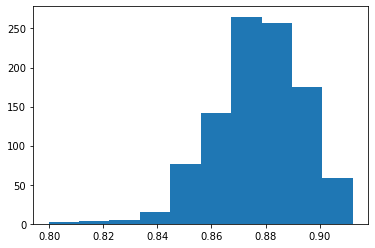

95.0 confidence interval 84.4% and 90.5%


In [185]:
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

###### XG Boost Regression

In [ ]:
values = concrete_XY.values

n_iterations = 1000        

n_size = int(len(concrete_df_z) * 1)    

stats = list()   
for i in range(n_iterations):
    
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
        rfTree = xgboost.XGBRegressor(n_estimators=100)
        rfTree.fit(train[:,:-1], train[:,-1]) 


    y_test = test[:,-1]    
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

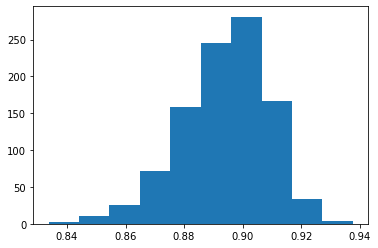

95.0 confidence interval 86.2% and 92.0%


In [187]:
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))